# Explainer Notebook - Marvel Network Analysis 

### Social data analysus and visualization

#### Authors: 
 - Kathrine Kahns Hille (s210526)
 - Kristo Karl Aedma (s205738)
 - Gudmundur Hermann Bjarnason (s203004)
 
 
 # <font color= 'red'> Link for the webpage of the MARVEL UNIVERSE ANALYSIS: </font> https://kito323.github.io/MarvelUniverses/
 
 

### Table of Contents

1. #### **Motivation**

2. #### **Basic Statistics**
    1. FIRST LOOK AT THE DATA 

3. #### **Tools, theory & analysis** 
    1. TOOLS 
    2. DATACLEANING AND PREPROCESSING 
    3. CREATING ENTIRE NETWORK OF ALL CHARACTERS
    4. DEGREE DISTRIBUTION OF ENTIRE NETWORK 
    5. CHARACTER ATTRIBUTE ANALYSIS 
    6. CHARACTERS AND UNIVERSE ANALYSIS 
    7. COMPARISON: MAIN UNIVERSE (EARTH-616) vs. OTHER 
    8. CHARACTERS IN EACH UNIVERSE 
    9. NETWORK THEORY COMPARISON
    10. FRIENDSHIP PARADOX FOR MARVEL CHARACTERS
    11. SENTIMENT ANALYSIS 

4. #### **Discussion** 
5. #### **Contributions** 


<a id='motivation'></a>
## 1. Motivation 

 - What is your dataset?
 - Why did you choose this/these particular dataset(s)?
 - What was your goal for the end user's experience?

The dataset chosen for this assignment is the full Marvel dataset from [marvel.fandom.com](https://marvel.fandom.com/wiki/Marvel_Database). 

The dataset of the Marvel characters was chosen as it provides a lot of information about all the multiverses/universe in Marvel and also because there are many attributes available describing all 36.414 unique characters. There are 36.414 unique characters, but the entire dataset contains 73.574 characters, as many characters appear in more than one chapter/universe. The characters are stored in a dictionary-like dataset with their names plus universe name in parenthesis (like in the Wiki; example: 'Peter Parker (Earth-616)') and they point to text information that is on the specific character's wiki page gathered using API. This provides the opportunity to investigate how many universes are available in the dataset and in how many universes each character appears.

Starting this assignment the assumption was that each universe had an extensive character-list of all characters in there. By investigation of the dataset this has led to some wondering of what it means with these universes and why there is such big difference between the number of characters in the universes. 

Each character is described by attributes and text. The attributes will be extracted from the description of each character to gain knowledge on the characters and to be able to see how they can differ. The attributes chosen that will be analysed further in this assignment are: gender, occupation, citizenship, identity and hair. 

A sentiment analysis will be carried out on wiki texts in order to find the characters with the most negative and positive influence. It can be argued that wiki text shouldn't have much sentiment but then again anyone has access to write it and descriptive text about extravagant characters probably still has some sentiment in it no matter how neutral it has been tried to made. 

A machine learning approach to predict how often the [friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox) rings true for a network was investigated. The goal of using machine learning is to present to the reader what variables are influential in deciding the success rate of the friendship paradox.

We will now try to take you through our process. It has taken quite a lot of work and insights have been gained as the analysis was carried out, so hang on tight and let's get into it! 
 

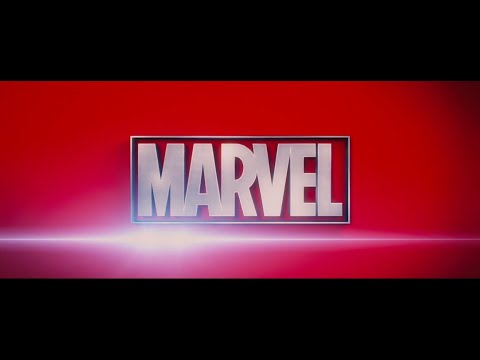

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('hwqjl6f4Ncc', width=800, height=300)

## Basic Statistics 

### FIRST LOOK AT THE DATA 

First the character names will be read into the explainer notebook by help of pickle module (more on that in the Tools section). The result of the scraping of the data has been saved in pickle text file as the huge amount of API request take a lot of time. In this basic statistics section we will take a brief look at the data, how it is read in and how many characters are contained in the data. During the analysis more basic statistics will be computed and analysed as a natural step in exploring the data. It has been chosen to structure it like this as it shows the natural process of investigating the data and the networks. 

First we read in the list of characters and few of them are seen printed below: 

In [2]:
import pickle
from pprint import pprint
import re
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.cbook as cbook
from PIL import ImageOps
import collections
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#reading in characters and printing the subset and the number of all characters 
characters = pickle.load(open('Marvel_Characters_pickle.txt','rb'))

pprint(characters[105:111])
print('\nThe total number of characters is: %d' %len(characters))

['Aaron Davis (Earth-TRN665)',
 'Aaron Davis (Earth-TRN700)',
 'Aaron Davis (Earth-TRN711)',
 'Aaron Delgato (Earth-928)',
 'Aaron Delgato (Earth-TRN389)',
 'Aaron Delgato (Earth-TRN579)']

The total number of characters is: 73574


And then the character descriptions will be read in also by help of pickle and a dict will be made with the character names as keys and then the descriptions as values. The number of character-description items in the dict is equal to the number of characters in the character list. 

In [4]:
character_descriptions = pickle.load(open('Marvel_Character_Descriptions_pickle.txt','rb'))

print(f'Number of characters in Marvel_Characters_pickle.txt: {len(characters)}')
print(f'Number of character descriptions in Marvel_Character_Descriptions_pickle.txt: {len(character_descriptions)}')

Number of characters in Marvel_Characters_pickle.txt: 73574
Number of character descriptions in Marvel_Character_Descriptions_pickle.txt: 73574


A character description is printed below to give a overview of the data. By scrolling through the description it is seen that there are some character attributes that can be filled to help describe each character. There is also a history section and nodes section provided as attributes. In the history sections it is possible to look for connected characters by use of Regex, which will be done shortly. 

In [5]:
pprint(list(character_descriptions.items())[113])

('Aaron Fischer (Earth-616)',
 '{{Marvel Database:Character Template\n'
 '| Image                   = Aaron Fischer (Earth-616) from United States of '
 'Captain America Vol 1 1 001.png\n'
 '| Name                    = Aaron Fischer\n'
 '| CurrentAlias            = Captain America\n'
 '| Aliases                 = Captain America of the Railways\n'
 '\n'
 '| Affiliation             = {{m|Captains Network}}\n'
 '| Relatives               = Unnamed father\n'
 '| MaritalStatus           = \n'
 '\n'
 '| CharRef                 = \n'
 '| Gender                  = Male\n'
 '| Height                  = \n'
 '| Weight                  = \n'
 '| Eyes                    = Blue\n'
 '| Hair                    = Black\n'
 '| UnusualFeatures         = Numerous tattoos and piercings, nose ring\n'
 '\n'
 '| Origin                  = Human\n'
 '| Reality                 = Earth-616\n'
 '| PlaceOfBirth            = [[Las Vegas]], [[Nevada (State)|Nevada]]\n'
 '| PlaceOfDeath            = \n'
 '\n'
 '| Id

## Tools, theory and analysis 

### TOOLS 

The tools used in the following analysis of the data are as follows: 
 - **[Regular Expressions](https://en.wikipedia.org/wiki/Regular_expression)** to find the attributes of interest and connected characters in each characters descriptions. As we were working using Python, we used the [RE library for Python](https://docs.python.org/3/library/re.html). <br><br>
 - **[Networkx](https://networkx.org/)** to store the information extracted from the descriptions and perform network analysis by looking at in- and out-degrees, degree-distributions, number of nodes and number of edges etc. <br><br>
 - **[Natural Language Toolkit](https://www.nltk.org/)** to analyse the frequency distribution of the words used to fill the character attributes in the descriptions of the characters. <br><br>
 - **[Matplotlib](https://matplotlib.org/), [Plotly](https://plotly.com/), [Bokeh](http://docs.bokeh.org/en/latest/)** to plot the frequency distributions of the attributes and to plot other things as the degree-distributions etc. Plotly and Bokeh are meant for interactive plots.<br><br>
 - **[Numpy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/)** to transform and store our data well in Python.<br><br>
 - **[pickle](https://docs.python.org/3/library/pickle.html)** to store our data easily outside of Python.<br><br>
 - **[WordCloud](http://amueller.github.io/word_cloud/)** to visualize the frequency distribution of the attribute words in a more appealing way <br><br>
 - **[Data from Mechanical Turk study (LabMT)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s4)** to calculate sentiment scores using dictionary-based method. <br><br>
 - **Machine learning**, specifically the scikit-learn Python library, to investigate a possible relationship between characteristics of a network and how often the friendship paradox proves true for that network. <br><br>


#### DATA CLEANING AND PREPROCESSING

To clean and preprocess the data we firstly use Regex to get the attributes chosen. The Regex expressions look for the pattern '| Gender  = ' and so on with the other attribute words. The expression defines how there is an undecided number of spaces between the vertical line and the attribute word, between the word and the '=' and again after '=' before the desired description we would like to capture. This is done by '\s+'. 

For the connected characters the Regex pattern is searching for the characters between '[[ ]]' and either before or after '|'. As this pattern does not only capture the names of characters, as we see in the printings below, we will need to do some further sorting of the characters, when adding them to the network. 

In [6]:
regexTest = str(character_descriptions['Alison Blaire (Earth-TRN727)'])

pattern_gender = r'\|\s+Gender\s+\=\s?(.*)'
pattern_identity = r'\|\s+Identity\s+\=\s?(.*)'
pattern_hair = r'\|\s+Hair\s+\=\s?(.*)'
pattern_citizenship = r'\|\s+Citizenship\s+\=\s?(.*)'
pattern_occupation = r'\|\s+Occupation\s+\=\s?(.*)'

pattern_connected_characters = r'\[\[(.*?)(?:\|.*?)?\]\]'

In [7]:
match_pattern_gender = re.findall(pattern_gender, regexTest)
print('Gender: '+match_pattern_gender[0])

match_pattern_identity = re.findall(pattern_identity, regexTest)
print('Identity: '+match_pattern_identity[0])

match_pattern_hair = re.findall(pattern_hair, regexTest)
print('Hairstyle: '+match_pattern_hair[0])

match_pattern_citizenship = re.findall(pattern_citizenship, regexTest)
print('Citizenship: '+match_pattern_citizenship[0])

match_pattern_occupation = re.findall(pattern_occupation, regexTest)
print('Occupation: '+match_pattern_occupation[0])

match_pattern_cc = re.findall(pattern_connected_characters, regexTest)
print('\nConnected character matches: ')
print(match_pattern_cc)

Gender: Female
Identity: No Dual
Hairstyle: Strawberry Blonde
Citizenship: American
Occupation: Adventurer, singer

Connected character matches: 
['Alison Blaire', 'Homo superior', "Xavier's School for Gifted Youngsters", 'Sentinels', 'James Proudstar (Earth-TRN727)', 'Alison Blaire (Earth-616)#Powers', 'Alison Blaire (Earth-616)', 'Earth-616', 'Alison Blaire (Earth-616)#Abilities', 'Alison Blaire (Earth-616)', 'Earth-616', 'Category:Acoustikinesis', 'Category:Photokinesis', 'Category:Medium range Energy Projection', 'Category:Concussive Blasts', 'Category:Singers']


### CREATING ENTIRE NETWORK OF ALL CHARACTERS

The dataset consist of all characters from all universes in Marvel. This therefore contains some characters more than once, as they appear in more than one universes. This will be elaborated later on. 

As mentioned above some sorting is needed when adding the connected characters of a node in the network. Therefor the for-loop is created before adding the connected character cc to check if the character is a part of the list of characters. 

When checking the number of nodes in the network this is equal to the number of characters in the list of characters gotten from fandom wiki which shows that no extra characters have been (wrongly) added. It would have been ideal to have the Regex pattern only identify the right characters, but as this did not seem possible this  was the next best solution and it does the job. 

Throughout the notebook cells like below (that are commented out using multi-line string) will be seen, as these are the ones containing the creation of big networks or other computations of data that is timeconsuming. Therefore these cells have been run once and then the information is saved to a pickle file from which the information can be easily reached when needed. This is extract in the cell below and then it can be used as if the information had just been computed. 

In [8]:
'''text = ''
D = nx.DiGraph()

for character in characters:
    text = str(character_descriptions[character])

    gender = re.findall(pattern_gender, text)
    identity = re.findall(pattern_identity, text)
    hair = re.findall(pattern_hair, text)
    citizenship = re.findall(pattern_citizenship, text)
    occupation = re.findall(pattern_occupation, text)
    connected_characters = re.findall(pattern_connected_characters, text)

    D.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)

    for cc in connected_characters:
        if cc in characters:
            D.add_edge(character, cc)
            
pickle.dump(D,open('D_graph.txt','wb'))'''

"text = ''\nD = nx.DiGraph()\n\nfor character in characters:\n    text = str(character_descriptions[character])\n\n    gender = re.findall(pattern_gender, text)\n    identity = re.findall(pattern_identity, text)\n    hair = re.findall(pattern_hair, text)\n    citizenship = re.findall(pattern_citizenship, text)\n    occupation = re.findall(pattern_occupation, text)\n    connected_characters = re.findall(pattern_connected_characters, text)\n\n    D.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)\n\n    for cc in connected_characters:\n        if cc in characters:\n            D.add_edge(character, cc)\n            \npickle.dump(D,open('D_graph.txt','wb'))"

In [9]:
D = pickle.load(open('D_graph.txt','rb'))

Number of nodes in the network:

In [10]:
print('The number of nodes in the network is: %d' %len(D.nodes))

The number of nodes in the network is: 73558


Number of edges in the network:

In [11]:
print('The number of edges in the network is: %d' %len(D.edges))

The number of edges in the network is: 271709


### DEGREE DISTRIBUTION OF ENTIRE NETWORK

The degree distribution will now be investigated. The most connected characters in terms of both in- and out-degrees are:

In [12]:
import pandas as pd
cc_in_degree = list(sorted(D.in_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_in_degree_df = pd.DataFrame(cc_in_degree, columns=['Title','In-degree'])
cc_in_degree_df.head()

,Title,In-degree
0,Peter Parker (Earth-616),1906
1,Steven Rogers (Earth-616),1689
2,Anthony Stark (Earth-616),1368
3,James Howlett (Earth-616),1233
4,Bruce Banner (Earth-616),1102


In [13]:
cc_out_degree = list(sorted(D.out_degree(),key=lambda x:x[1],reverse=True))[:10] 
# Convert list to dataframe for better presentation
cc_out_degree_df = pd.DataFrame(cc_out_degree, columns=['Title','Out-degree'])
cc_out_degree_df.head() 

,Title,Out-degree
0,Krakoa (Earth-616),345
1,Bruce Banner (Earth-616),281
2,James Howlett (Earth-616),276
3,Peter Parker (Earth-616),248
4,William Baker (Earth-616),221


From the top-connected characters we see how (Earth-616) is referenced frequently. This chapter/universe is stated to be the main universe according to marvel.fandom.wiki [Ref 4]. Therefore the characters in this universe are frequently referenced from other universes which is why the in-degree is so much higher compared to the out degree. In both in- and out-degrees it is seen that Bruce Banner (Hulk), Peter Parker (Spiderman), Steven Rogers (Captain America), Anthony Stark (Ironman) and James Howlett (Wolverine) who are all central characters in the Marvel univers as to why this makes sense. 

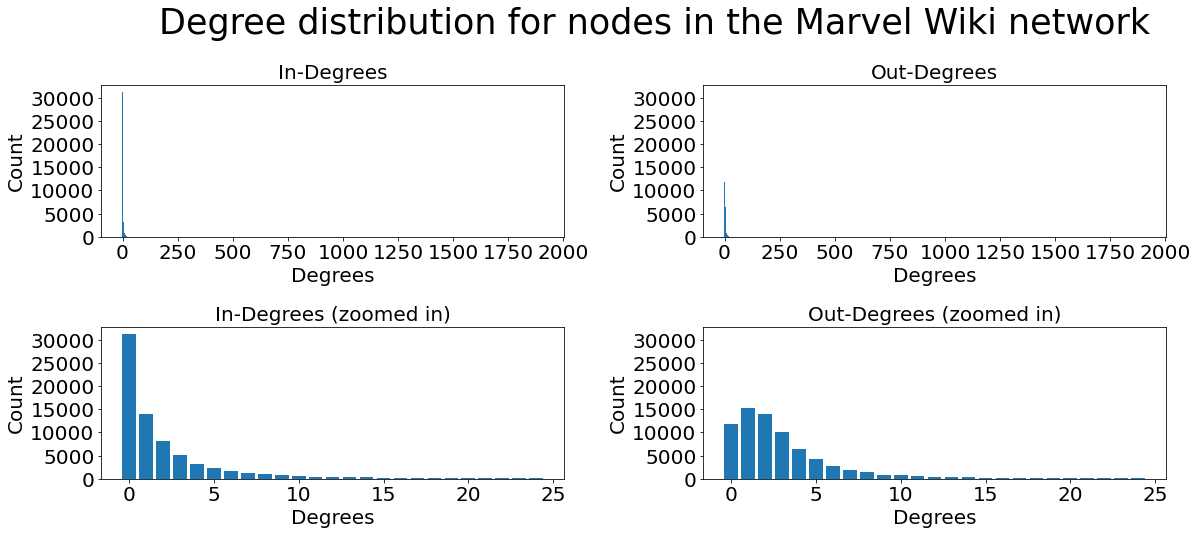

In [14]:
def plot_degree_dist_directed(G):
    degrees_in = [G.in_degree(n) for n in G.nodes()]
    degrees_out = [G.out_degree(n) for n in G.nodes()]
    
    # Distribution for in-degree 
    listv_in = list(range(min(degrees_in),max(degrees_in)+2)) # Includes one over
    v_in = np.array(listv_in) - 0.5
    
    hist_in = np.histogram(degrees_in, bins=v_in)
    binedges_in = hist_in[1]
    heights_in = hist_in[0]
    midpoints_in = np.array([((binedges_in[i]+binedges_in[i+1])/2) for i in range(len(binedges_in)-1)])
    
    # Distribution for out-degree
    listv_out = list(range(min(degrees_out),max(degrees_out)+2)) # include one over
    v_out = np.array(listv_out) - 0.5
    
    hist_out = np.histogram(degrees_out, bins=v_out)
    binedges_out = hist_out[1]
    heights_out = hist_out[0]
    midpoints_out = np.array([((binedges_out[i]+binedges_out[i+1])/2) for i in range(len(binedges_out)-1)])
    
    # Plotting the distributions 
    plt.figure(figsize=(17,7))
    # Set fontsize for plots
    fontsize=20

    
    ax1 = plt.subplot(2,2,1)
    plt.bar(midpoints_in, heights_in)
    plt.title('In-Degrees',fontsize=fontsize)
    plt.xlabel('Degrees',fontsize=fontsize)
    plt.ylabel('Count',fontsize=fontsize)
    
    ax2 = plt.subplot(2,2,2, sharex=ax1, sharey=ax1)
    plt.bar(midpoints_out, heights_out)
    plt.title('Out-Degrees',fontsize=fontsize)
    plt.xlabel('Degrees',fontsize=fontsize)
    plt.ylabel('Count',fontsize=fontsize)
    # plt.shared_x_axes().join(ax1,ax2)
    # plt.shared_y_axes().join(ax1, ax2)

    ax3 = plt.subplot(2,2,3)
    plt.bar(midpoints_in[:25],heights_in[:25])
    plt.title('In-Degrees (zoomed in)',fontsize=fontsize)
    plt.xlabel('Degrees',fontsize=fontsize)
    plt.ylabel('Count',fontsize=fontsize)

    ax4 = plt.subplot(2,2,4,sharex=ax3,sharey=ax3)
    plt.bar(midpoints_out[:25],heights_out[:25])
    plt.title('Out-Degrees (zoomed in)',fontsize=fontsize)
    plt.xlabel('Degrees',fontsize=fontsize)
    plt.ylabel('Count',fontsize=fontsize)

    # Change fontsize of xticks and yticks
    for ax in [ax1,ax2,ax3,ax4]:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()): 
            label.set_fontsize(fontsize)

    plt.tight_layout(pad=2)
    plt.figtext(0.14,1.02,'Degree distribution for nodes in the Marvel Wiki network',fontsize=35)

    plt.show()

plot_degree_dist_directed(D)

The degree distribution show how the majority of the nodes/characters have a relatively low both in- and out-degree where the vast majority have a degree below 10 for both. There are many, many side characters in the Marvel universe, and it makes sense that most of them are only referenced no, one, or two times, and that's why the in-degree count for degrees 0-3 is so high. The out-degree, however, is not affected by this; a page can link to as many other characters as the article allows. Therefore, it makes sense that the out-degrees are more evenly distirbuted, with a higher degree being more common than for the in-degree distribution.

Exponent of the degree distribution for both in- and out degrees found by use of the powerlaw package: 

In [15]:
# Finding the exponent of the in-degree distribution 
import powerlaw
print('IN-DEGREE EXPONENT:')
in_degree = []

for node in D.nodes():
    in_degree.append(D.in_degree(node))

fit_in = powerlaw.Fit(in_degree)
print(round(fit_in.power_law.alpha,3))
print('\n')

# Finding the exponent of the out-degree distribution
print('OUT-DEGREE EXPONENT:')
out_degree = []

for node in D.nodes():
    out_degree.append(D.out_degree(node))

fit_out = powerlaw.Fit(out_degree)
print(round(fit_out.power_law.alpha,3))
print('\n')

IN-DEGREE EXPONENT:
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/root/venv/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2.356


OUT-DEGREE EXPONENT:
2.819


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


We move on to the distribution for in- and out-degree visualized on loglog-scale. This will demonstrate the power-law nature of the network. It will be able to give us a visual confirmation of the degree exponents obtained above.

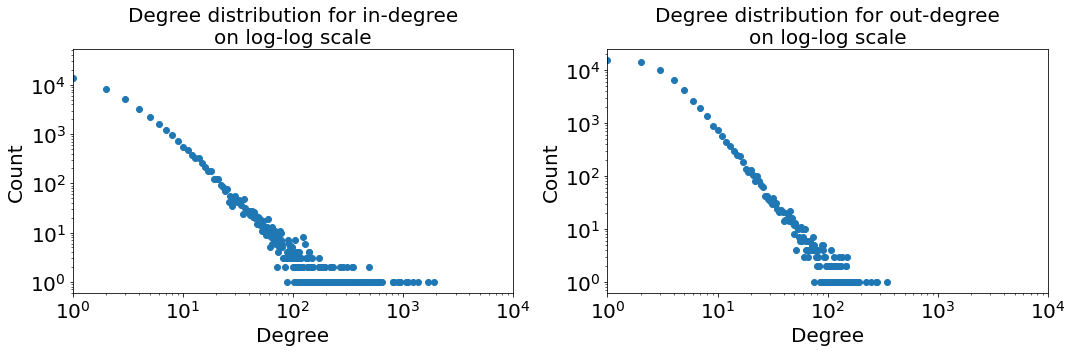

In [16]:
def plot_degree_dist(H, bins=100, xlim=None, titles=None, in_out=False):
    fontsize = 20
    if not in_out: # undirected version
        plt.figure(figsize=(15,3))
        degrees = [H.degree(n) for n in H.nodes()]
        unique, degree_hist = np.unique(degrees,return_counts=True)

        plt.subplot(1,2,1)
        ax1 = plt.scatter(x=unique,y=degree_hist)
        plt.title('Degree distribution on linear scale')
        plt.xlabel('Degree')
        plt.ylabel('Count')

        plt.subplot(1,2,2)
        plt.title('Degree distribution on log scale')
        ax2 = plt.scatter(x=unique,y=degree_hist)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degree')
        plt.ylabel('Count')
        if xlim is not None:
            ax2.set_xlim(left=xlim[0],right=xlim[1])

        plt.yticks([1,10,100,1000])
        plt.show()
    else: # plotting in- and out-degrees (directed)
        plt.figure(figsize=(15,5))
        degree_in = [v for k,v in dict(H.in_degree()).items()]
        degree_out = [v for k,v in dict(H.out_degree()).items()]
        unique_in, degree_hist_in = np.unique(degree_in,return_counts=True)
        unique_out, degree_hist_out = np.unique(degree_out,return_counts=True)

        plt.subplot(1,2,1)
        plt.title('Degree distribution for in-degree\non log-log scale',fontsize=fontsize)

        plt.scatter(x=unique_in,y=degree_hist_in)

        # Plot line approximation
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degree',fontsize=fontsize)
        plt.ylabel('Count',fontsize=fontsize)
        if xlim is not None:
            plt.xlim(left=xlim[0],right=xlim[1])
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)

        plt.subplot(1,2,2)
        plt.title('Degree distribution for out-degree\non log-log scale',fontsize=fontsize)

        plt.scatter(x=unique_out,y=degree_hist_out)

        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Degree',fontsize=fontsize)
        plt.ylabel('Count',fontsize=fontsize)
        if xlim is not None:
            plt.xlim(left=xlim[0],right=xlim[1])

        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)

        plt.tight_layout()
        plt.show()


plot_degree_dist(D,xlim=[1,10000],in_out=True)
    

Both networks appear to follow a $p_k\sim k^{-\gamma}$ distribution (equation (4.1) in the [Network Science Book](http://networksciencebook.com/)), where $k$ is the degree, and $\gamma$ is the degree exponent. We can see this from the fact that the log-log plots show roughly straight lines.

The in-degree and out-degree exponents calculated above are the slopes of the log-log plot of the distributions, which can be seen in the above plots.

Referring to Box 4.5 in the textbook, we can see that the in-degree distribution falls in the "scale-free" regime, while the out-degree distribution also falls in the scale-free network regime, although it is a little closer to 3 than the in-degree distribution.

Comparing this with the four-way distribution plot with zoomed-in versions for the in- and out-degrees for the all-characters network, we can see that the out-degree distribution resembles more a random network than does the in-degree distribution.

### CHARACTER ATTRIBUTE ANALYSIS

From the descriptions of characters it is possible to extract different attributes describing the characters. The ones focused on will be *gender, identity, occupation, citizenship and hairstyle* as these are the attributes of interest. 

First we will find all the variables used to describe a character attribute and add them to lists in order to assess how many different variables are used in the dataset. This information will be used to make a frequency distribution plots and wordclouds for all attributes. 

In [17]:
gender_words =[]
identity_words = []
hair_words = []
citizenship_words = []
occupation_words = []

for character in characters:
    text = str(character_descriptions[character])

    gender = re.findall(pattern_gender, text)
    identity = re.findall(pattern_identity, text)
    hair = re.findall(pattern_hair, text)
    citizenship = re.findall(pattern_citizenship, text)
    occupation = re.findall(pattern_occupation, text)

    if gender: 
        gender_words.append(gender[0].lower().replace(' ', ''))

    if identity:
        identity_words.append(identity[0].lower().replace(' ',''))

    if hair:
        hair_words.append(hair[0])
    
    if citizenship:
        citizenship_words.append(citizenship[0])
    
    if occupation:
        occupation_words.append(occupation[0])
        
attributes_list = [(gender_words, 'gender'), (identity_words, 'identity'), (hair_words, 'hair'), (citizenship_words, 'citizenship'), (occupation_words, 'occupation')]

Number of characters with missing info about gender: 1982


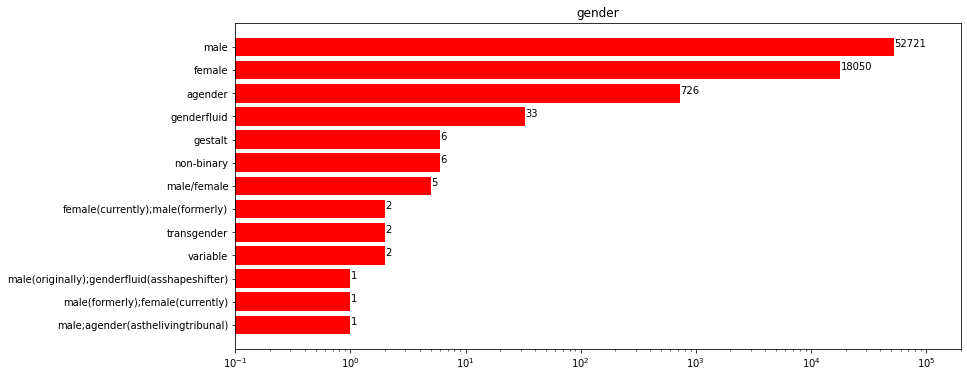

Number of characters with missing info about identity: 10429


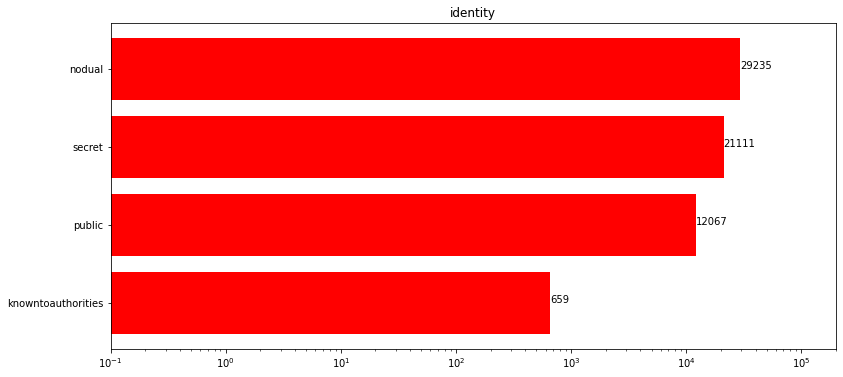

Number of characters with missing info about hair: 20861


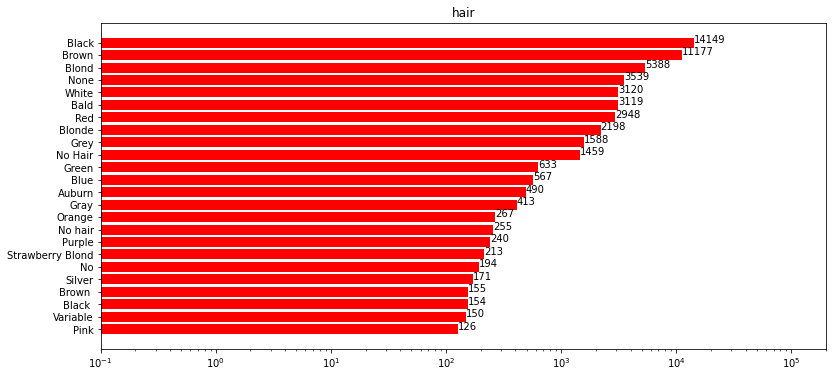

Number of characters with missing info about citizenship: 30164


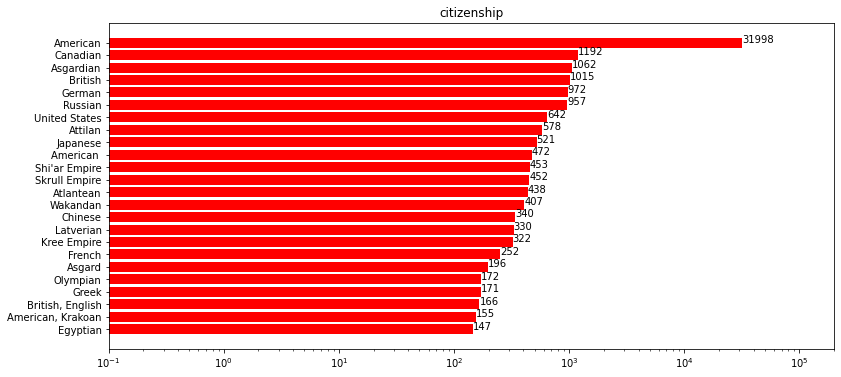

Number of characters with missing info about occupation: 57200


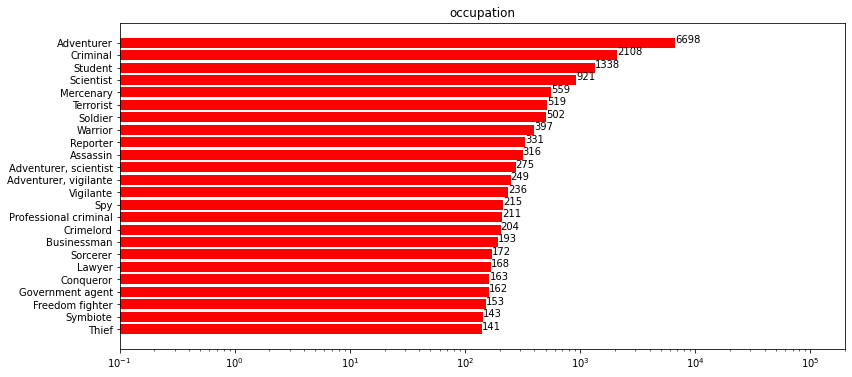

In [18]:
#GENDER
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def freqency_distribution(word_list, word):
    fdist = FreqDist(word_list)
    fdistword = fdist.most_common(25)
    
    characters_word_described = 0
    for tuple_ in fdistword:
        characters_word_described += tuple_[1]
    nrCharacters = len(characters)

    word_dict = {}
    for tuple_ in fdistword:
        key = tuple_[0]

        if key == '':
            key = 'none'

        if '|' not in key and '<' not in key:
            word_dict[key] = tuple_[1]

    # make bar chart 
    word_dict_sorted = dict(sorted(word_dict.items(), key=lambda item: item[1]))
    word_none = word_dict_sorted['none']
    del word_dict_sorted['none']
    
    missingInfo_word = nrCharacters - characters_word_described + word_none
    print('Number of characters with missing info about %s: %d' %(word, missingInfo_word))

    keys = list(word_dict_sorted.keys())
    values = word_dict_sorted.values()

    plt.figure(figsize=(13,6))
    plt.xscale('log')
    plt.xlim(0.1,200000)

    for index, value in enumerate(list(word_dict_sorted.values())): 
        plt.text(value, index, str(value))
    
    plt.title(word)
    plt.barh(keys, values, color='red')
    plt.show()
    
for attribute_tuple in attributes_list:
    freqency_distribution(attribute_tuple[0], attribute_tuple[1])
    


From plotting the frequency distribution of the different attributes we see the most frequent occuring types. This provides us the information that almost all character's gender is described, the vast majority of character's identity is described and 5/7 character's hair is described. Most surprising is it that only about half of the character's citizenship is described and the vast majority of character with citizenship descriptions are americans. Only 2/7 characters have occupation descriptions. 

We will also create word-clouds to present the information in a more visually fun way: 

In [19]:
wordlists = {'identity': identity_words, 'citizenship': citizenship_words, 'hair': hair_words, 'occupation': occupation_words, 'gender': gender_words}
wordclouds = []

for key_, list_of_words in wordlists.items():
    fdist = FreqDist(list_of_words)
    fdistidt = fdist.most_common(1000)
    
    worddict = {}
    for tuple_ in fdistidt:
        key = tuple_[0]

        if key == '':
            key = 'none'

        if '|' not in key and '<' not in key and '=' not in key:
            worddict[key] = tuple_[1]
    
    del worddict['none']
    
    wc = WordCloud(background_color="white", max_words=100,relative_scaling=0.5,normalize_plurals=False, colormap='Reds_r').generate_from_frequencies(worddict)
    wordclouds.append((wc,key_))

In [20]:
#Plotting word-clouds 
def plot_wordclouds(wordclouds):
    fig=plt.figure(figsize=(15,10))
    for (i, wc_tuple) in enumerate(wordclouds):
        # Convert wordcloud to image
        # that can be manipulated
        img = wc_tuple[0].to_image()
        # Expand the image so that it now 
        # includes a black border
        ax = plt.subplot(2,3,i+1)
        plt.title(wc_tuple[1],fontsize=20)
        plt.axis('off')
        plt.imshow(img,aspect='auto')

    plt.suptitle('Word clouds for the five different attributes',fontsize=25,y=1.01)    

    # tight_layout creates space between subplots
    fig.tight_layout()
    plt.show()

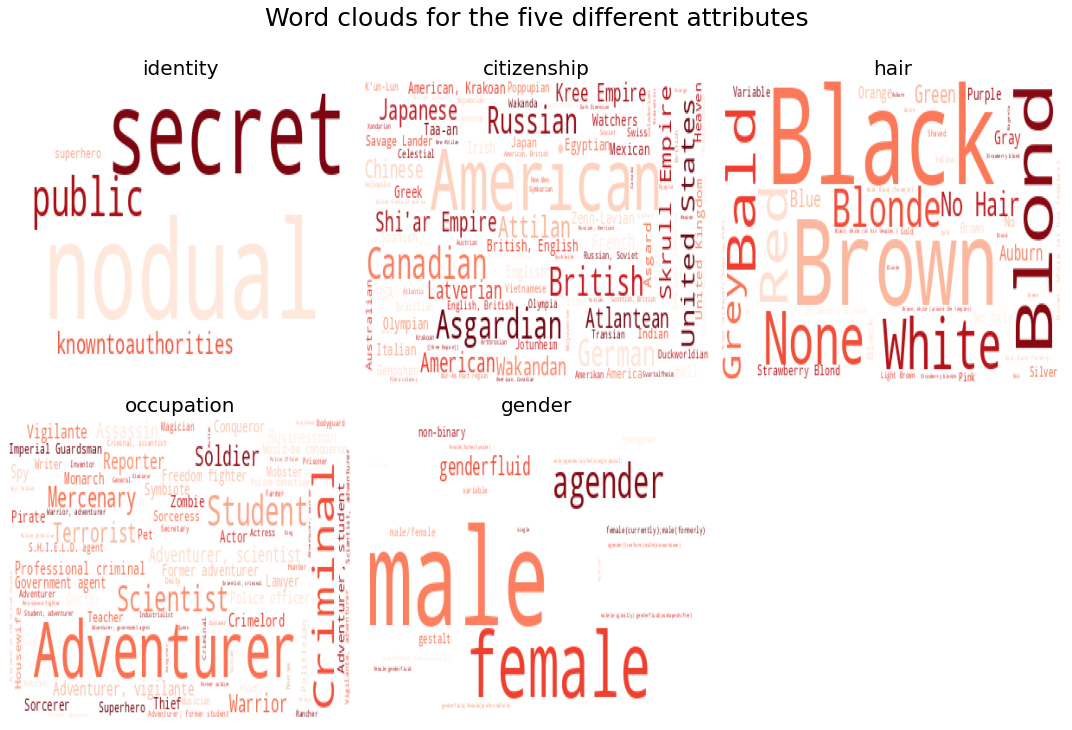

In [21]:
plot_wordclouds(wordclouds)

The wordclouds present the same trends as the barplots did. 

### CHARACTERS AND CHAPTER/UNIVERSE ANALYSIS

We will now analyze the characters of the universes and the universes as well. 

Firstly we will take a look at the number of universes in the dataset (found as they are listed in the names of the characters). 

Then we will take a look at how many unique characters are contained in the dataset. This is done by making a list of all characters in the entire set but without the (*universe*) parenthesis and then counting the occurence of characters.  

In [22]:
#Number of worlds/universes in the data 
worlds = []

for character in characters:
    if '(' in character:
        world = character.split('(')[1].replace(')', '')
        worlds.append(world)

unique_worlds = list(set(worlds))

worlds_ = []
for world in unique_worlds:
    if 'Earth' in world: 
        worlds_.append(world)

print('Number of universes: %d' %len(worlds_))


#Number of unique characters 
unique_no_uniinfo = []

for character in characters:
    if '(' in character:
        char = character.split('(')[0]
        unique_no_uniinfo.append(char)
    else:
        unique_no_uniinfo.append(char)

set_unique_characters = list(set(unique_no_uniinfo))

print('Number of unique characters: %d' %len(set_unique_characters))

Number of universes: 2503
Number of unique characters: 36414


Then it is investigated how many universes each character appear in. This is done by counting the number of times the characters names are in the list of characters where the parenthesis containing universe-information has been removed. 

The 30 characters appearing in most universes are then printed alongside the number of universes they appear in:

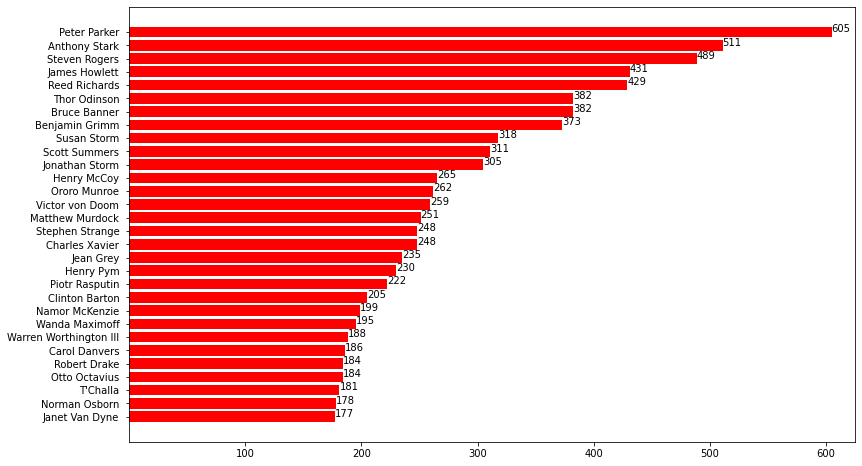

In [23]:
number_of_universes_each_character_is_mentioned_in=collections.Counter(unique_no_uniinfo)

#The 30 characters that appear in most universes 
chars_in_uni = dict(number_of_universes_each_character_is_mentioned_in.most_common(30))
chars_in_uni_sorted = dict(sorted(chars_in_uni.items(), key=lambda item: item[1]))

keys = list(chars_in_uni_sorted.keys())
values = chars_in_uni_sorted.values()

plt.figure(figsize=(13,8))
plt.xlim(0.1,625)

for index, value in enumerate(list(chars_in_uni_sorted.values())): 
    plt.text(value, index, str(value))
    
plt.barh(keys, values, color='red')
plt.show() 

It is seen how Peter Parker appear in 605 universes and is the character appearing in most. Peter Parker is Spiderman's civil name and characters, which is why it makes sense. Anthony Stark, Steven Rogers and James Howlett are Iron Man, Captain America and Wolverine respectively and these are also main characters of the universe as to why it makes a lot of sense that these are reference in a high number of universes.  

We will now extract the characters mentioned in more than 5 universes:

In [24]:
dict_characters_nr_universes = dict(number_of_universes_each_character_is_mentioned_in)
characters_more5= []
characters_5orless= []

for key, value in dict_characters_nr_universes.items():
    if value > 5:
        characters_more5.append(key)
    else:
        characters_5orless.append(key)

print('The number of characters mentioned in more than 5 universes are: %d' %len(characters_more5))
print('The number of characters mentioned in only 5 universe are: %d' %len(characters_5orless))

The number of characters mentioned in more than 5 universes are: 1042
The number of characters mentioned in only 5 universe are: 35372


For all of the characters mentioned in more than 5 universes, we get all their specific universe names. As an example 'Peter Parker' also has the name 'Peter Parker (Earth-616)' and then similar names for all the other universes he is mentioned in. We get all of these to be able to collect all character descriptions for each character and concatenate them: 

In [25]:
dict_specific_universe_character_names = {}

for character in characters_more5:
    list_specific_universe_character_names = []
    for character_key in character_descriptions.keys():
        if character in character_key:
            list_specific_universe_character_names.append(character_key)
            
    dict_specific_universe_character_names[character] = list_specific_universe_character_names

dict_specific_universe_character_names['Janet Van Dyne '][:10]

['Janet Van Dyne (Earth-1048)',
 'Janet Van Dyne (Earth-1089)',
 'Janet Van Dyne (Earth-110)',
 'Janet Van Dyne (Earth-1226)',
 'Janet Van Dyne (Earth-161)',
 'Janet Van Dyne (Earth-1610)',
 'Janet Van Dyne (Earth-1611)',
 'Janet Van Dyne (Earth-2010)',
 'Janet Van Dyne (Earth-2081)',
 'Janet Van Dyne (Earth-2108)']

Then we make a dictionary with the character names (without universe information) as keys, and the concatenated descriptions as value for each character. This dict can now be used to investigate connected characters across all universes. 

In [26]:
dict__characterdescriptions_alluniverses = {}

for character_name, character_universe_names in dict_specific_universe_character_names.items():
    character_text = ''
    for universe_name in character_universe_names:
        character_text += character_descriptions[universe_name]
    
    dict__characterdescriptions_alluniverses[character_name] = character_text

And we do use it to create a network of characters across universes with the attribute information of the attributes previously described. 

#### Directed network of characters present in more than one universes 

In [27]:
'''pattern_gender = r'\|\s+Gender\s+\=\s?(.*)'
pattern_identity = r'\|\s+Identity\s+\=\s?(.*)'
pattern_hair = r'\|\s+Hair\s+\=\s?(.*)'
pattern_citizenship = r'\|\s+Citizenship\s+\=\s?(.*)'
pattern_occupation = r'\|\s+Occupation\s+\=\s?(.*)'

pattern_connected_characters = r'\[\[(.*?)(?:\|.*?)?\]\]'

D_m1 = nx.DiGraph()

for character, description in dict__characterdescriptions_alluniverses.items():
    gender = re.findall(pattern_gender, description)
    identity = re.findall(pattern_identity, description)
    hair = re.findall(pattern_hair, description)
    citizenship = re.findall(pattern_citizenship, description)
    occupation = re.findall(pattern_occupation, description)
    connected_characters = re.findall(pattern_connected_characters, description)
    
    c_gender = collections.Counter(gender).most_common(1)[0][0]
    c_identity = collections.Counter(identity).most_common(1)[0][0]
    c_hair = collections.Counter(hair).most_common(1)[0][0]
    c_citizenship = collections.Counter(citizenship).most_common(1)[0][0]
    c_occupation = collections.Counter(occupation).most_common(1)[0][0]

    D_m1.add_node(character, ngender = c_gender, nidentity = c_identity, nhair = c_hair, ncitizenship = c_citizenship, noccupation = c_occupation)

    for cc in connected_characters:
        cc_split = cc.split('(')[0]
        if cc_split in characters_more5 and cc_split != character:
            D_m1.add_edge(character, cc_split)

pickle.dump(D_m1,open('D_m1_graph.txt','wb'))'''

"pattern_gender = r'\\|\\s+Gender\\s+\\=\\s?(.*)'\npattern_identity = r'\\|\\s+Identity\\s+\\=\\s?(.*)'\npattern_hair = r'\\|\\s+Hair\\s+\\=\\s?(.*)'\npattern_citizenship = r'\\|\\s+Citizenship\\s+\\=\\s?(.*)'\npattern_occupation = r'\\|\\s+Occupation\\s+\\=\\s?(.*)'\n\npattern_connected_characters = r'\\[\\[(.*?)(?:\\|.*?)?\\]\\]'\n\nD_m1 = nx.DiGraph()\n\nfor character, description in dict__characterdescriptions_alluniverses.items():\n    gender = re.findall(pattern_gender, description)\n    identity = re.findall(pattern_identity, description)\n    hair = re.findall(pattern_hair, description)\n    citizenship = re.findall(pattern_citizenship, description)\n    occupation = re.findall(pattern_occupation, description)\n    connected_characters = re.findall(pattern_connected_characters, description)\n    \n    c_gender = collections.Counter(gender).most_common(1)[0][0]\n    c_identity = collections.Counter(identity).most_common(1)[0][0]\n    c_hair = collections.Counter(hair).most_commo

In [28]:
D_m1 = pickle.load(open('D_m1_graph.txt','rb'))
# Remove isolated nodes
D_m1.remove_nodes_from(list(nx.isolates(D_m1)))

In [29]:
print('The network contains %d nodes, and %d links' %(len(D_m1.nodes()), len(D_m1.edges())))

The network contains 1041 nodes, and 46924 links


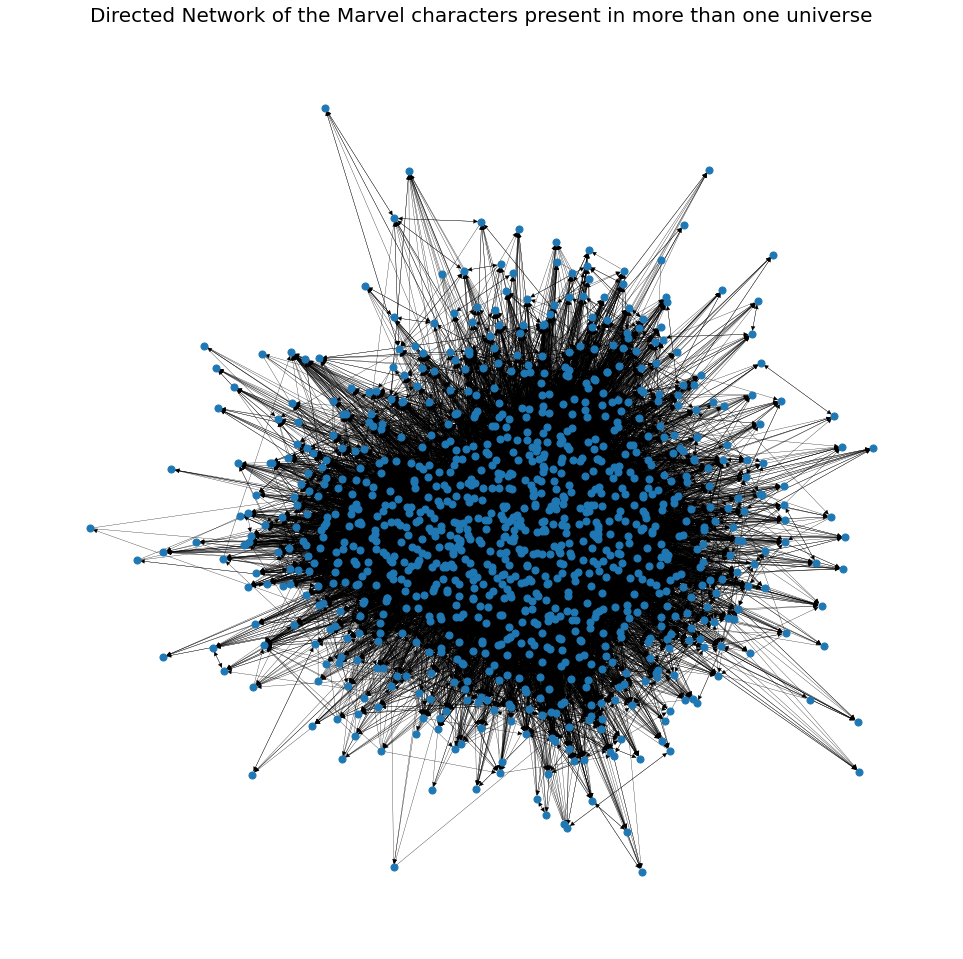

In [30]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_title('Directed Network of the Marvel characters present in more than one universe',fontsize=20)
nx.draw(D_m1, node_size=50, width=0.3)

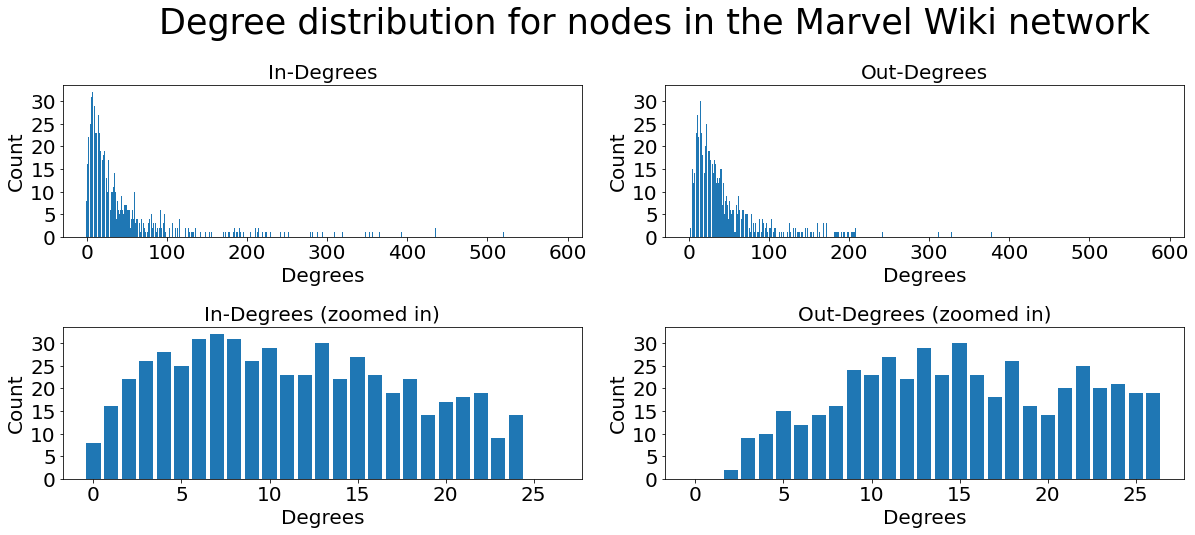

In [31]:
plot_degree_dist_directed(D_m1)

The degree distribution of the network across universes of characters appearing in more than 1 universe, shows how most characters have both in- and out-degrees below 100. Then there are some having in- and out-degrees between 100-300 and a few (Spiderman, Iron Man, Captain America and Wolverine) having a very high in- and/or out-degree. Again the reason that these specific characters have high degrees are because of their central role in the marvel universes. 

In [32]:
import pandas as pd 
cc_in_degree = list(sorted(D_m1.in_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_in_degree_df = pd.DataFrame(cc_in_degree, columns=['Title','In-degree'])
cc_in_degree_df.head()

,Title,In-degree
0,Peter Parker,588
1,Anthony Stark,527
2,Steven Rogers,520
3,James Howlett,447
4,Bruce Banner,435


In [33]:
cc_out_degree = list(sorted(D_m1.out_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_out_degree_df = pd.DataFrame(cc_out_degree, columns=['Title','Out-degree'])
cc_out_degree_df.head()

,Title,Out-degree
0,Peter,476
1,Peter Parker,378
2,Steven Rogers,346
3,James Howlett,330
4,Anthony Stark,328


### INTERACTIVE NETWORK PLOT (CHARACTERS PRESENT IN MORE THAN 1 CHAPTER/UNIVERSE)
The network of characters appearing in more than one chapter/universe will be created below as an interactive bokeh network. This network makes it possible to inspect the attributes of the network by hovering over the nodes from which information is wanted. 

In [34]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.io import export_png

#[Ref 2]

#Choose a title!
title = 'Marvel Network of characters appearing in more than 1 universe'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=600, plot_height=600,
            x_range=Range1d(-0.1, 0.1), y_range=Range1d(-0.1, 0.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(D_m1, nx.spring_layout, scale=1, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

#export_png(plot, filename = "bokeh_plot_Dm1.png")

show(plot)
#save(plot, filename=f"{title}.html")

Another interactive network is created which instead shows how the nodes are connected to each other, which can be investigated by moving the cursor around hovering over different nodes. 

In [35]:
import networkx as nx

from bokeh.models import Range1d, MultiLine, Circle, HoverTool
from bokeh.models.graphs import from_networkx, EdgesAndLinkedNodes, NodesAndLinkedEdges
from bokeh.plotting import figure, show


title = 'Marvel Network of characters in Earth-616 that also appear in more than 5 universes '

#HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

plot = figure(tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=1000, plot_height=1000,
            x_range=Range1d(-0.1,0.1), y_range=Range1d(-0.1,0.1), title = title)

node_hover_tool = HoverTool(tooltips=[("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")])
plot.add_tools(node_hover_tool)

r = from_networkx(D_m1, nx.spring_layout, scale=1, center=(0,0))

r.node_renderer.glyph = Circle(size=10, fill_color='skyblue')
r.node_renderer.hover_glyph = Circle(size=10, fill_color='#abdda4')

r.edge_renderer.glyph = MultiLine(line_alpha=0, line_width=3)  # zero line alpha
r.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=3)


r.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(r)

show(plot)

In [36]:
#[Ref 3]

#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = '#abdda4'

#Choose a title!
title = 'Marvel Network of characters in Earth-616 that also appear in more than 5 universes '

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=1000, plot_height=1000,
            x_range=Range1d(-0.1, 0.1), y_range=Range1d(-0.1, 0.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(D_m1, nx.spring_layout, scale=1, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=10, fill_color='#abdda4', line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=10, fill_color='#abdda4', line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.2, line_width=2)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

### COMPARISON: MAIN UNIVERSE (EARTH-616) vs. OTHER UNIVERSES

Earth-616 is considered the main universe. This is stated by marvel.fandom.wiki and also that other universes are usually compared to this one. So know an analysis of Earth-616 will be carried out and compared to other universes. We start by taking a look at the number of characters in Earth-616. 

In [37]:
#Number of worlds/universes in the data 
characters_616 = []

for character in characters:
    if '(Earth-616)' in character:
        characters_616.append(character)

print('The number of characters in Earth-616 is %d' %len(characters_616))

The number of characters in Earth-616 is 29941


And then we grab all of the descriptions of the characters from the characters descriptions to be able to identify attributes and connected components. This is then identified and added to a network to store the information. This storing has been done in a pickle-file such that it is not needed to create the network everytime the code needs to be run. 

In [38]:
characters_616_dict = {}

for character in characters_616:
    characters_616_dict[character] = character_descriptions[character]

In [39]:
'''D_616 = nx.DiGraph()

for character, description in characters_616_dict.items():
    gender = re.findall(pattern_gender, description)
    identity = re.findall(pattern_identity, description)
    hair = re.findall(pattern_hair, description)
    citizenship = re.findall(pattern_citizenship, description)
    occupation = re.findall(pattern_occupation, description)
    connected_characters = re.findall(pattern_connected_characters, description)

    D_616.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)

    for cc in connected_characters:
        if cc in characters_616: 
            D_616.add_edge(character, cc)

pickle.dump(D_616,open('D_616_graph.txt','wb'))'''

"D_616 = nx.DiGraph()\n\nfor character, description in characters_616_dict.items():\n    gender = re.findall(pattern_gender, description)\n    identity = re.findall(pattern_identity, description)\n    hair = re.findall(pattern_hair, description)\n    citizenship = re.findall(pattern_citizenship, description)\n    occupation = re.findall(pattern_occupation, description)\n    connected_characters = re.findall(pattern_connected_characters, description)\n\n    D_616.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)\n\n    for cc in connected_characters:\n        if cc in characters_616: \n            D_616.add_edge(character, cc)\n\npickle.dump(D_616,open('D_616_graph.txt','wb'))"

D_616 is the network containing all of the data:

In [40]:
D_616 = pickle.load(open('D_616_graph.txt','rb'))

In [41]:
print('The network contains %d nodes, and %d links' %(len(D_616.nodes()), len(D_616.edges())))

The network contains 29941 nodes, and 128703 links


We then wanted to carry out analysis on the Giant Connected Component (GCC) of the network and also visualize it. As the GCC (as seen below) is very large and contains many links, this will not be visualized. Instead a look will be taken at the characters (nodes) in Earth-616 (network D_616) that also appear in more than 5 universes. This gives us the opportunity to compare the network of characters in Earth-616 and the network of characters containing information from multiple universes. The network created is then created from the descriptions only from Earth-616 but with the nodes/characters that appear in more than 5 universes. 

In [42]:
largest_cc_D616 = max(nx.weakly_connected_components(D_616), key=len)
gcc_D616 = D_616.subgraph(largest_cc_D616)

In [43]:
print('The GCC contains %d nodes, and %d links' %(len(gcc_D616.nodes()), len(gcc_D616.edges())))

The GCC contains 23610 nodes, and 126245 links


So we take the nodes from D_m1 (network of characters appearing in more than 5 universes) and make a subgraph of the same characters from Earth-616:

In [44]:
nodes_from_Dm1_to_D616 = []

for node in list(D_m1.nodes()):
    nodes_from_Dm1_to_D616.append(node+'(Earth-616)')

D_616_same_nodes_as_Dm1 = nx.subgraph(D_616, nodes_from_Dm1_to_D616)

D_616_snad = nx.DiGraph(D_616_same_nodes_as_Dm1)

print('The subgraph from D_616 contains %d nodes' %len(list(D_616_snad.nodes)))
print('The network of characters appearing in more than five universes D_m1 contains %d nodes' %len(list(D_m1.nodes)))
diff = len(list(D_m1.nodes))-len(list(D_616_snad.nodes))
print('This means that %d characters from the network of characters appearing in more than five universes do not appear in Earth-616' %diff)

The subgraph from D_616 contains 835 nodes
The network of characters appearing in more than five universes D_m1 contains 1041 nodes
This means that 206 characters from the network of characters appearing in more than five universes do not appear in Earth-616


In [45]:
to_be_removed = [x for  x in D_616_snad.nodes() if D_616_snad.degree(x) == 0]

for x in to_be_removed:
    D_616_snad.remove_node(x)

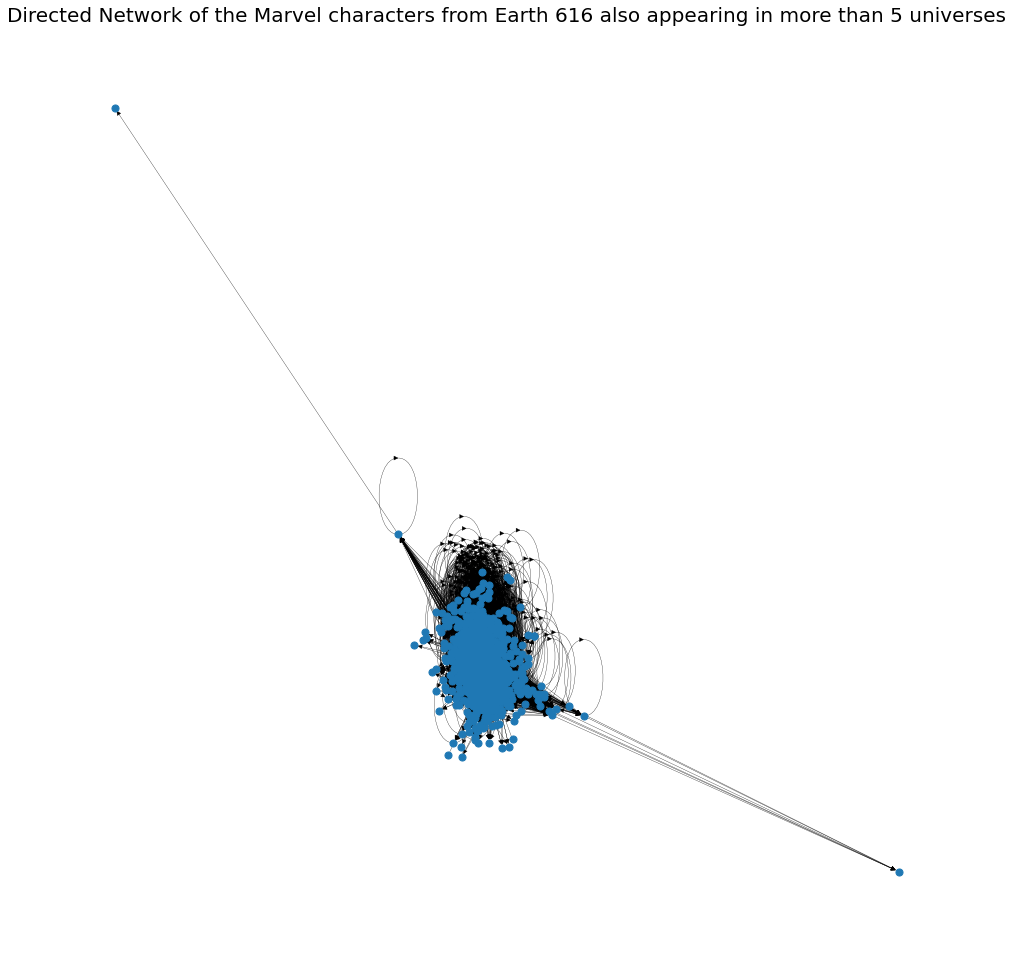

In [46]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_title('Directed Network of the Marvel characters from Earth 616 also appearing in more than 5 universes',fontsize=20)

nx.draw(D_616_snad, node_size=50, width=0.3)

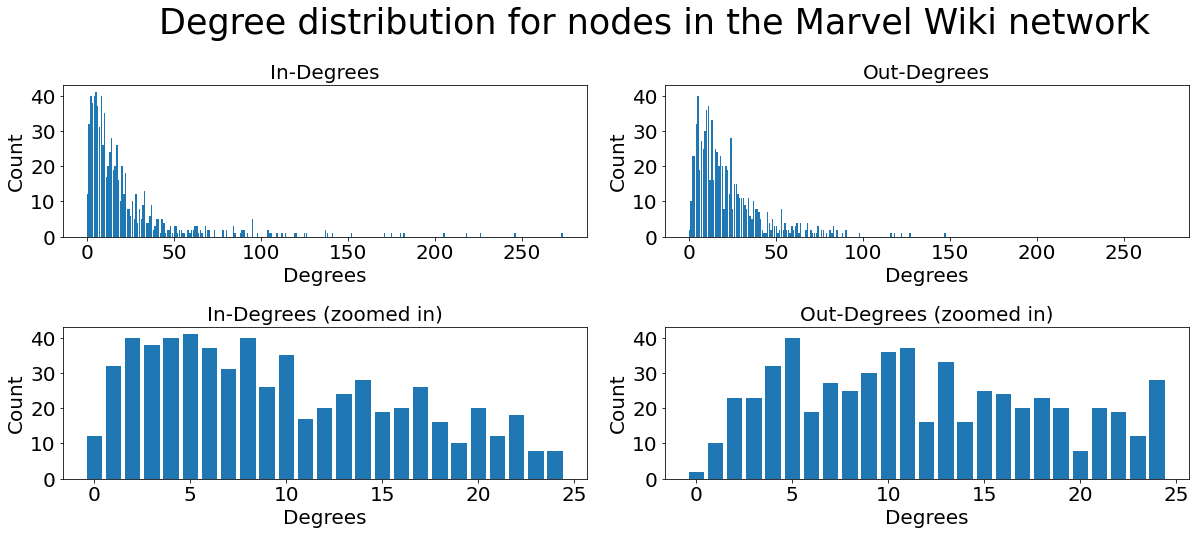

In [47]:
plot_degree_dist_directed(D_616_snad)

The degree distribution shows how there are most characters with in- and out-degrees below 50 but a few with high degrees. Below we see how it is the same characters that seem to reoccur as the ones with high degrees as they are central characters in the marvel universe. 

In [48]:
cc_in_degree = list(sorted(D_616_snad.in_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_in_degree_df = pd.DataFrame(cc_in_degree, columns=['Title','In-degree'])
cc_in_degree_df.head()

,Title,In-degree
0,Peter Parker (Earth-616),273
1,Steven Rogers (Earth-616),246
2,Anthony Stark (Earth-616),226
3,Bruce Banner (Earth-616),218
4,James Howlett (Earth-616),205


In [49]:
cc_out_degree = list(sorted(D_616_snad.out_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_out_degree_df = pd.DataFrame(cc_out_degree, columns=['Title','Out-degree'])
cc_out_degree_df.head()

,Title,Out-degree
0,Bruce Banner (Earth-616),147
1,Krakoa (Earth-616),127
2,Peter Parker (Earth-616),122
3,William Baker (Earth-616),118
4,James Howlett (Earth-616),116


### INTERACTIVE NETWORK PLOT (CHARACTERS PRESENT IN MORE THAN 5 CHAPTERS/UNIVERSES AND IN EARTH-616)

Firstly an interactive plot is made to be able to inspect the names and attributes of the node hovered over. Then a plot is made to be able to inspect the the connected components of the character hovered over. A third interactive plot is then made bringing the interactive parts of the first two together. In the resulting plot it is therefore possible to inspect both the character by name, attributes and connections by hovering over him/her. 

In [50]:
#[Ref 2]

#Choose a title!
title = 'Marvel Network of characters in Earth-616 that also appear in more than 5 universes'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=600, plot_height=600,
            x_range=Range1d(-0.1, 0.1), y_range=Range1d(-0.1, 0.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(D_616_snad, nx.spring_layout, scale=1, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

#export_png(plot, filename = "bokeh_plot_Dm1.png")

show(plot)
save(plot, filename=f"{title}.html")

/shared-libs/python3.7/py/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/shared-libs/python3.7/py/lib/python3.7/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/work/FINAL - APB /Marvel Network of characters in Earth-616 that also appear in more than 5 universes.html'

In [51]:
import networkx as nx

from bokeh.models import Range1d, MultiLine, Circle, HoverTool
from bokeh.models.graphs import from_networkx, EdgesAndLinkedNodes
from bokeh.plotting import figure, show

title = 'Marvel Network of characters in Earth-616 that also appear in more than 5 universes '

#HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

plot = figure(tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=1000, plot_height=1000,
            x_range=Range1d(-0.1,0.1), y_range=Range1d(-0.1,0.1), title = title)

node_hover_tool = HoverTool(tooltips=[("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")])
plot.add_tools(node_hover_tool)

r = from_networkx(D_616_snad, nx.spring_layout, scale=1, center=(0,0))

r.node_renderer.glyph = Circle(size=10, fill_color='skyblue')
r.node_renderer.hover_glyph = Circle(size=10, fill_color='#abdda4')

r.edge_renderer.glyph = MultiLine(line_alpha=0, line_width=3)  # zero line alpha
r.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=3)


r.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(r)

show(plot)

In [52]:
#[Ref 3]

#Choose colors for node and edge highlighting 
node_highlight_color = 'white'
edge_highlight_color = '#abdda4'

#Choose a title!
title = 'Marvel Network of characters in Earth-616 that also appear in more than 5 universes '

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index"), ("Gender", "@ngender"), ("Identity", "@nidentity"), ("Hairstyle", "@nhair"), ("Citizenship", "@ncitizenship"), ("Occupation","@noccupation")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', plot_width=1000, plot_height=1000,
            x_range=Range1d(-0.1, 0.1), y_range=Range1d(-0.1, 0.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(D_616_snad, nx.spring_layout, scale=1, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=10, fill_color='#abdda4', line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=10, fill_color='#abdda4', line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.2, line_width=2)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

    #Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

#### Earth 210 

The thought was to choose some different universes and compare these to the main universe Earth-616. But as this analysis of other universes started we saw how Earth 210 contains only 5 characters, as to why this universe analysis is not carried out. This indicates some big differences in universes, som universes contain a lot of characters and even some also present in other universes, while others seem to only contain very few. That a character is contained in the data for a universe means that this characters is either a resident or has been to the planet. The following cells show the network from Earth 210.

In [53]:
#Number of worlds/universes in the data 
characters_210 = []

for character in characters:
    if '(Earth-210)' in character:
        characters_210.append(character)
        
print('The number of characters in Earth-210 is %d' %len(characters_210))

The number of characters in Earth-210 is 5


In [54]:
characters_210_dict = {}

for character in characters_210:
    characters_210_dict[character] = character_descriptions[character]

In [55]:
D_210 = nx.DiGraph()

for character, description in characters_210_dict.items():
    gender = re.findall(pattern_gender, description)
    identity = re.findall(pattern_identity, description)
    hair = re.findall(pattern_hair, description)
    citizenship = re.findall(pattern_citizenship, description)
    occupation = re.findall(pattern_occupation, description)
    connected_characters = re.findall(pattern_connected_characters, description)

    D_210.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)

    for cc in connected_characters:
        if cc in characters_210: 
            D_210.add_edge(character, cc)

In [56]:
print('The network contains %d nodes, and %d links' %(len(D_210.nodes()), len(D_210.edges())))

The network contains 5 nodes, and 15 links


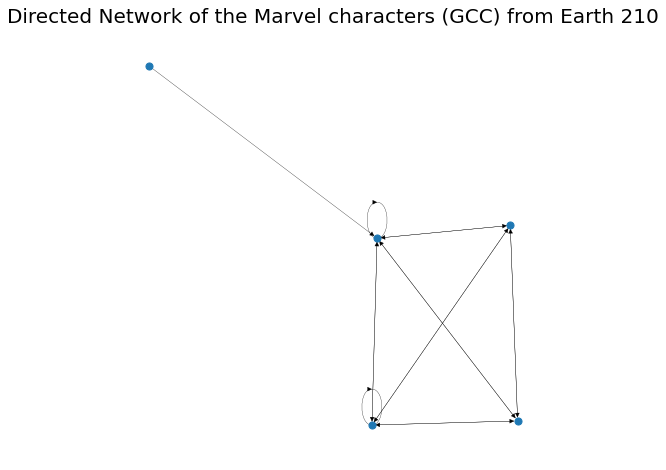

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Directed Network of the Marvel characters (GCC) from Earth 210',fontsize=20)
nx.draw(D_210, node_size=50, width=0.3)

In [58]:
cc_in_degree = list(sorted(D_210.in_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_in_degree_df = pd.DataFrame(cc_in_degree, columns=['Title','In-degree'])
cc_in_degree_df.head()

,Title,In-degree
0,Thanos (Earth-210),5
1,Anthony Stark (Earth-210),4
2,Peter Parker (Earth-210),3
3,Peter Quill (Earth-210),3
4,Death (Earth-210),0


In [59]:
cc_out_degree = list(sorted(D_210.out_degree(),key=lambda x:x[1],reverse=True))[:10]
# Convert list to dataframe for better presentation
cc_out_degree_df = pd.DataFrame(cc_out_degree, columns=['Title','In-degree'])
cc_out_degree_df.head()

,Title,In-degree
0,Anthony Stark (Earth-210),4
1,Thanos (Earth-210),4
2,Peter Parker (Earth-210),3
3,Peter Quill (Earth-210),3
4,Death (Earth-210),1


It seems by further investigation that the characters contained in the universes, are the characters that have been to the particular Earth-XX. Earth-616 is then the planet/universe most characters have been to, while only five characters have been to Earth-210. This leads to investigating the number of characters that have been to each universe.

### CHARACTERS IN EACH UNIVERSE 

We see how there are very few characters in Earth 210, which leads to the interest of making a character distribution graph. 

In [60]:
nr_characters_pr_universe = {}

for universe in worlds_: 
    characters_in_world = []
    for character in characters:
        if universe in character:
            characters_in_world.append(character)
    nr_characters_pr_universe[universe] = len(characters_in_world)

In [61]:
sorted_nr_characters_pr_universe = dict(sorted(nr_characters_pr_universe.items(), key=lambda item: item[1]))
print('Universes with most characters:')
print(list(sorted_nr_characters_pr_universe.items())[-10:])
print('\nUniverses with least characters:')
print(list(sorted_nr_characters_pr_universe.items())[:10])

Universes with most characters:
[('Earth-4', 1029), ('Earth-161', 1188), ('Earth-199999', 1206), ('Earth-11', 1326), ('Earth-12', 1797), ('Earth-5', 2039), ('Earth-8', 3706), ('Earth-9', 9073), ('Earth-616', 30075), ('Earth-6', 31821)]

Universes with least characters:
[('Counter-Earth ', 0), ('Earth Sprite ', 0), ('Sub-Earth Men ', 0), ('Earth-86018', 1), ('Earth-22371', 1), ('Earth-TRN872', 1), ('Earth-39811', 1), ('Earth-122-35', 1), ('Earth-24530', 1), ('Earth-62577', 1)]


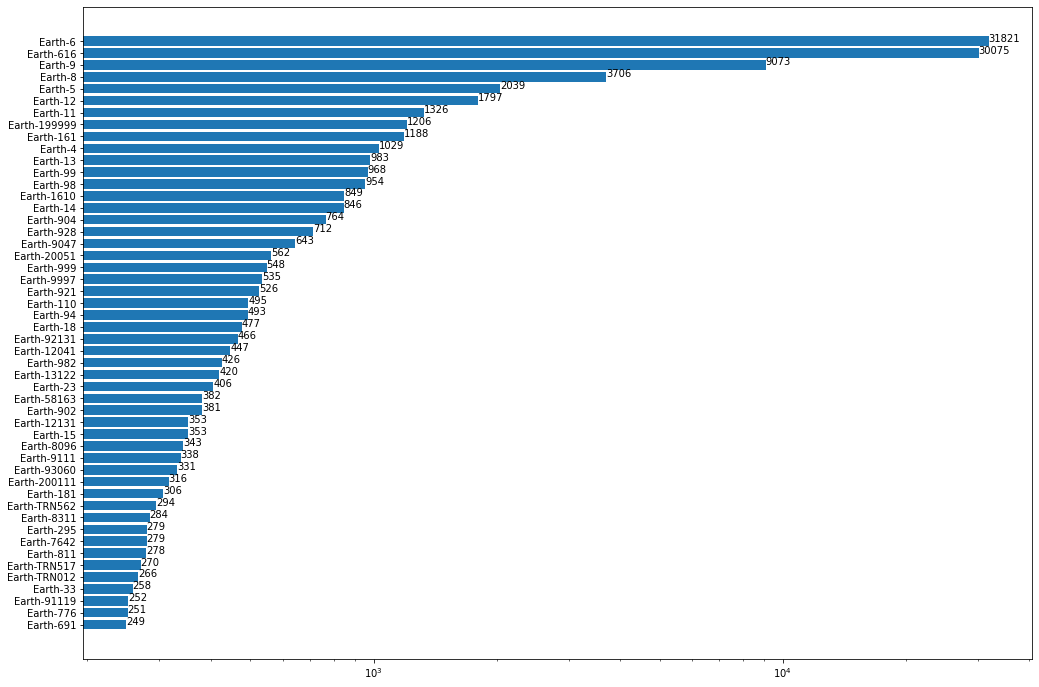

In [62]:
universes_for_plot = {} 

for key in list(sorted_nr_characters_pr_universe)[len(list(sorted_nr_characters_pr_universe))-50:len(list(sorted_nr_characters_pr_universe))]:
    universes_for_plot[key] = sorted_nr_characters_pr_universe[key]
    
plt.figure(figsize=(17,12))
plt.barh(range(len(universes_for_plot)), list(universes_for_plot.values()), align='center')
plt.yticks(range(len(universes_for_plot)), list(universes_for_plot.keys()))
plt.xscale('log')

for index, value in enumerate(list(universes_for_plot.values())): 
    plt.text(value, index, str(value))

plt.show()

From the above plot it is seen how Earth-616 (the main universe) has many characters but is succeeded by Earth-6. Earth-6 is home to Captain Britain. Many characters have either resided or been to this planet according to the data. A comic X-of-Swords: Destruction #1 which has many chapters play out partly on this planet, which is why many characters are found here. But Earth-616 has been analysed as this is the main universe according to the fandom page. 

### NETWORK THEORY COMPARISON
The different networks created will now be analysed in ordner to gain a greater understanding of the differences of the networks created by sorting and cleaning the data in different ways. The networks being compared are the entire network of the approx 73000 characters, the network of characters present in more than 5 networks, the entire Earth 616 network and the network of characters in Earth-616 also occuring in more than 5 universes. 

##### Average degree and average shortest path

In [63]:
# <k> = 2L/N
k_avg_D = (2*(len(D.edges)))/len(D.nodes)
k_avg_D_m1 = (2*(len(D_m1.edges)))/len(D_m1.nodes)
k_avg_D616 = (2*(len(D_616.edges)))/len(D_616.nodes)
k_avg_D616_snad = (2*(len(D_616_snad.edges)))/len(D_616_snad.nodes)

print('Average degree for the entire network is: {:.2f}'.format(k_avg_D))
print('Average degree for the network of characters appearing in more than 5 universes is: {:.2f}'.format(k_avg_D_m1))
print('Average degree for the entire Earth-616 is: {:.2f}'.format(k_avg_D616))
print('Average degree for the network of Earth-616 characters appearing in more than 5 universes is: {:.2f}'.format(k_avg_D616_snad))


# <d> approx ln(N)/ln(<k>)
d_avg_D = np.log(len(D.nodes))/np.log(k_avg_D)
d_avg_D_m1 = np.log(len(D_m1.nodes))/np.log(k_avg_D_m1)
d_avg_D616 = np.log(len(D_616.nodes))/np.log(k_avg_D616)
d_avg_D616_snad = np.log(len(D_616_snad.nodes))/np.log(k_avg_D616_snad)

print('\nAverage shortest path for the entire network is: {:.2f}'.format(d_avg_D))
print('Average shortest path for the network of characters appearing in more than 5 universes is: {:.2f}'.format(d_avg_D_m1))
print('Average shortest path for the entire Earth-616 is: {:.2f}'.format(d_avg_D616))
print('Average shortest path for the network of Earth-616 characters appearing in more than 5 universes is: {:.2f}'.format(d_avg_D616_snad))

Average degree for the entire network is: 7.39
Average degree for the network of characters appearing in more than 5 universes is: 90.15
Average degree for the entire Earth-616 is: 8.60
Average degree for the network of Earth-616 characters appearing in more than 5 universes is: 44.17

Average shortest path for the entire network is: 5.60
Average shortest path for the network of characters appearing in more than 5 universes is: 1.54
Average shortest path for the entire Earth-616 is: 4.79
Average shortest path for the network of Earth-616 characters appearing in more than 5 universes is: 1.77


The average degree tells us about how well connected the nodes in the networks are. The average degree for the entire network and the entire network of Earth-616 characters have a somewhat high average degree meaning that the nodes are well connected. The network containing the characters present in more than 5 universes has a very high average degree of 89.23. This makes sense as the characters have had their universe information removed from their names, and all the descriptions of each character regardless of universes are summed up. The connected components for each character is then found in the summed descriptions and therefor it is the connected characters for all universes they appear in and the average degree will therefore be higher, which it also is. The average degree of the network created from Earth-616 is very high when it is taken into account that the connected characters here are found in the descriptions for only Earth-616. The network of characters in this universe must be said to be very connected. 

##### Network regimes

In [64]:
ln_D = np.log(len(D.nodes))
ln_D_m1 = np.log(len(D_m1.nodes))
ln_D616 = np.log(len(D_616.nodes))
ln_D616_snad = np.log(len(D_616_snad.nodes))

#We see that all <k> are bigger then one, so if we check for the connected regime we have the answer 
print('<k> > ln(N) for entire network is ' + str(k_avg_D > ln_D))
print('<k> > ln(N) for the network of characters appearing in more than 5 universes is ' + str(k_avg_D_m1 > ln_D_m1))
print('<k> > ln(N) for the entire Earth-616 is ' + str(k_avg_D616 > ln_D616))
print('<k> > ln(N) for the network of Earth-616 characters appearing in more than 5 universes is ' + str(k_avg_D616_snad > ln_D616_snad))

<k> > ln(N) for entire network is False
<k> > ln(N) for the network of characters appearing in more than 5 universes is True
<k> > ln(N) for the entire Earth-616 is False
<k> > ln(N) for the network of Earth-616 characters appearing in more than 5 universes is True


The average degree of the networks can be used to analyse which regime they are in. In the printings above it is analysed whether the networks are in the connected regime. All the average degrees are above 1, which means that if the statements are False, they are in the supercritical regime, and if the statements are true, the networks are in the connected regime. The entire network and the network of the entire Earth-616 universe are both in the supercritical regime, while the two networks containing central characters (central characters as they are present in more than 5 universes) are in the connected regime. 

Being in the connected regime means that all the nodes have been consumed by the Giant Connected Component [Ref 1], which is the case for the two networks of the central characters. 

### FRIENDSHIP PARADOX FOR MARVEL CHARACTERS 

In this section, we are going to investigate the relatinship between how often the friendship paradox rings true, and some other properties of a network.

The dataset we will use is networks from all universes. We will see in this section that they are quite different from the mostly massive networks we have been looking at so far.

In [65]:
'''universe_networks_characters = {} 

for universe in worlds_:   
    characters_inuni = []
    for character in characters: 
        if '('+universe+')' in character:
            characters_inuni.append(character)
    
    universe_networks_characters[universe] = characters_inuni
    
universe_networks = {}

for universe, characters_in_uni in universe_networks_characters.items():
    D_uni = nx.Graph()
    
    for character in characters_in_uni:
        
        description = character_descriptions[character]

        gender = re.findall(pattern_gender, description)
        identity = re.findall(pattern_identity, description)
        hair = re.findall(pattern_hair, description)
        citizenship = re.findall(pattern_citizenship, description)
        occupation = re.findall(pattern_occupation, description)
        connected_characters = re.findall(pattern_connected_characters, description)

        D_uni.add_node(character, ngender = gender, nidentity = identity, nhair = hair, ncitizenship = citizenship, noccupation = occupation)

        for cc in connected_characters:
            if cc in characters:
                cc_split = cc.split('(')[0]
                D_uni.add_edge(character, cc_split)
    
    
    universe_networks[universe] = D_uni'''

"universe_networks_characters = {} \n\nfor universe in worlds_:   \n    characters_inuni = []\n    for character in characters: \n        if '('+universe+')' in character:\n            characters_inuni.append(character)\n    \n    universe_networks_characters[universe] = characters_inuni\n    \nuniverse_networks = {}\n\nfor universe, characters_in_uni in universe_networks_characters.items():\n    D_uni = nx.Graph()\n    \n    for character in characters_in_uni:\n        \n        description = character_descriptions[character]\n\n        gender = re.findall(pattern_gender, description)\n        identity = re.findall(pattern_identity, description)\n        hair = re.findall(pattern_hair, description)\n        citizenship = re.findall(pattern_citizenship, description)\n        occupation = re.findall(pattern_occupation, description)\n        connected_characters = re.findall(pattern_connected_characters, description)\n\n        D_uni.add_node(character, ngender = gender, nidentity = iden

In [66]:
'''pickle.dump(universe_networks,open('universe_networks_pickle.txt','wb'))'''

"pickle.dump(universe_networks,open('universe_networks_pickle.txt','wb'))"

In [67]:
universe_networks = pickle.load(open('universe_networks_pickle.txt','rb'))

In [68]:
import random
def paradox_check(H, n):
    true = 0

    for i in range(n):
        node = random.choice(list(H.nodes))

        neighbors = H.neighbors(node)
        avg_degree = 0
        N = 0
        for neighbor in neighbors:
            N += 1
            avg_degree += H.degree[neighbor]
        if avg_degree != 0:
            avg_degree /= N
        if H.degree[node] < avg_degree:
            true += 1
    #print(f'The friendship paradox was true {true} out of {n} times.')
    return true/n

In [69]:
'''import powerlaw
from scipy.special import zeta
from IPython.display import clear_output
import community_louvain as community

universe_tests = {}
universe_pk = {}
for i, (name, network) in enumerate(universe_networks.items()):
    clear_output(wait=True)
    print(f'Iteration {i}')
    # We don't want very small networks since the degree exponent
    # might be ill-defined
    if len(network.edges()) < 50: continue

    edges = network.edges()
    len_edges = len(edges)

    # Fetch number of nodes
    len_nodes = len(network.nodes())
    
    # Calculate average degree
    avg_degree = 2*len_edges/len_nodes
    
    # Calculate degree exponent
    degrees = [degree[1] for degree in network.degree()]
    exponent = powerlaw.Fit(degrees,verbose=False).power_law.alpha

    # Calculate p as if network was random
    p_r = avg_degree/(len_nodes-1)
    
    # Calculate number of times the friendship paradox
    # was true for this universe's network
    n_paradox = paradox_check(network, 1000)
    
    # p_k for the network
    # i.e., the probability that a node has exactly k edges
    universe_pk[name] = range(1,50)**(-exponent)/zeta(exponent)
    
    universe_tests[name] = [len_nodes,len_edges,avg_degree,exponent,p_r,n_paradox]'''


"import powerlaw\nfrom scipy.special import zeta\nfrom IPython.display import clear_output\nimport community_louvain as community\n\nuniverse_tests = {}\nuniverse_pk = {}\nfor i, (name, network) in enumerate(universe_networks.items()):\n    clear_output(wait=True)\n    print(f'Iteration {i}')\n    # We don't want very small networks since the degree exponent\n    # might be ill-defined\n    if len(network.edges()) < 50: continue\n\n    edges = network.edges()\n    len_edges = len(edges)\n\n    # Fetch number of nodes\n    len_nodes = len(network.nodes())\n    \n    # Calculate average degree\n    avg_degree = 2*len_edges/len_nodes\n    \n    # Calculate degree exponent\n    degrees = [degree[1] for degree in network.degree()]\n    exponent = powerlaw.Fit(degrees,verbose=False).power_law.alpha\n\n    # Calculate p as if network was random\n    p_r = avg_degree/(len_nodes-1)\n    \n    # Calculate number of times the friendship paradox\n    # was true for this universe's network\n    n_p

In [70]:
'''pickle.dump(universe_tests,open('universe_tests.txt','wb'))'''

"pickle.dump(universe_tests,open('universe_tests.txt','wb'))"

In [71]:
universe_tests = pickle.load(open('universe_tests_best.txt','rb'))

To spot possible relationships between variables, let's plot a scatter matrix of the data, i.e., we will plot each variable against each other variable in the dataset.

Scatter matrix of various characteristics of each universe's network. The diagonal line is histograms for each variable.

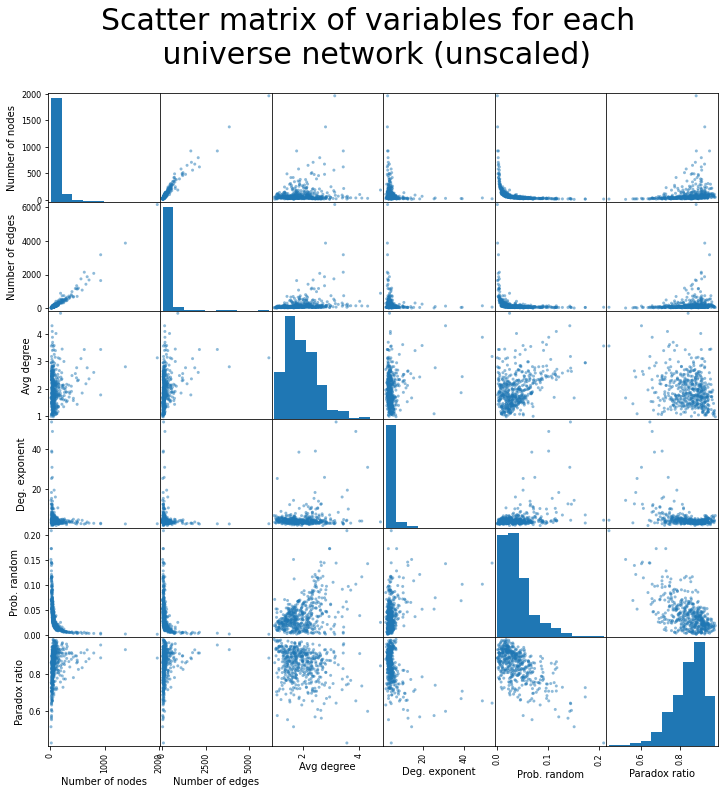

In [72]:
import matplotlib.pyplot as plt
from math import log

def rename(columns):
    return dict(zip(range(len(columns)),columns))

columns_verbose = ['Number of nodes','Number of edges','Avg degree',
                   'Deg. exponent','Prob. random','Paradox ratio']
uni_df = pd.DataFrame.from_dict(universe_tests,orient='index')
unidf_re = uni_df.rename(columns=rename(columns_verbose),inplace=False)

# Scatter matrix without scaling some variables
_ = pd.plotting.scatter_matrix(unidf_re,figsize=(12,12))
plt.suptitle('Scatter matrix of variables for each \n universe network (unscaled)',fontsize=30)
plt.show()

This is a little difficult to interpret for some variables. We'll try a log-transform, but first:

Let's investigate this correlative relationship further by using the Pearson coefficient correlation matrix:

In [73]:
round(unidf_re.corr(),3)

,Number of nodes,Number of edges,Avg degree,Deg. exponent,Prob. random,Paradox ratio
Number of nodes,1.000,0.969,0.181,-0.128,-0.422,0.210
Number of edges,0.969,1.000,0.295,-0.098,-0.320,0.168
Avg degree,0.181,0.295,1.000,0.219,0.421,-0.230
Deg. exponent,-0.128,-0.098,0.219,1.000,0.361,-0.424
Prob. random,-0.422,-0.320,0.421,0.361,1.000,-0.613
Paradox ratio,0.210,0.168,-0.230,-0.424,-0.613,1.000


The correlation between the number of nodes and number of edges is extremely high (0.969). Random forest regressors are sensitive to correlated variables, so we remove the number of edges from consideration.

The number of nodes isn't likely to predict the friendship paradox ratio very well; the number of nodes says nothing about the actual network structure (i.e., the way nodes are connected to one another). Therefore, we remove the number of nodes from consideration as well. We leave in the average degree, because the average degree is closely related to the friendship paradox. However, since the average degree is included in the calculated probability for the network's average degree and its number of nodes, we do not expect it to be as important in the prediction as the other variables.

As can be seen in this figure, many of the variables have extreme outliers, i.e., it is an extremely large network, compared to most other networks. A regressor that is insensitive to outliers is a random forest regressor.

In [74]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    unidf_scale = unidf_re.copy()
    unidf_scale['Number of nodes'] = np.log(unidf_scale['Number of nodes'])
    unidf_scale['Number of edges'] = np.log(unidf_scale['Number of edges'])
    unidf_scale['Prob. random'] = np.log(unidf_scale['Prob. random'])
    unidf_scale = unidf_scale.rename(columns=rename(columns_verbose),inplace=False)


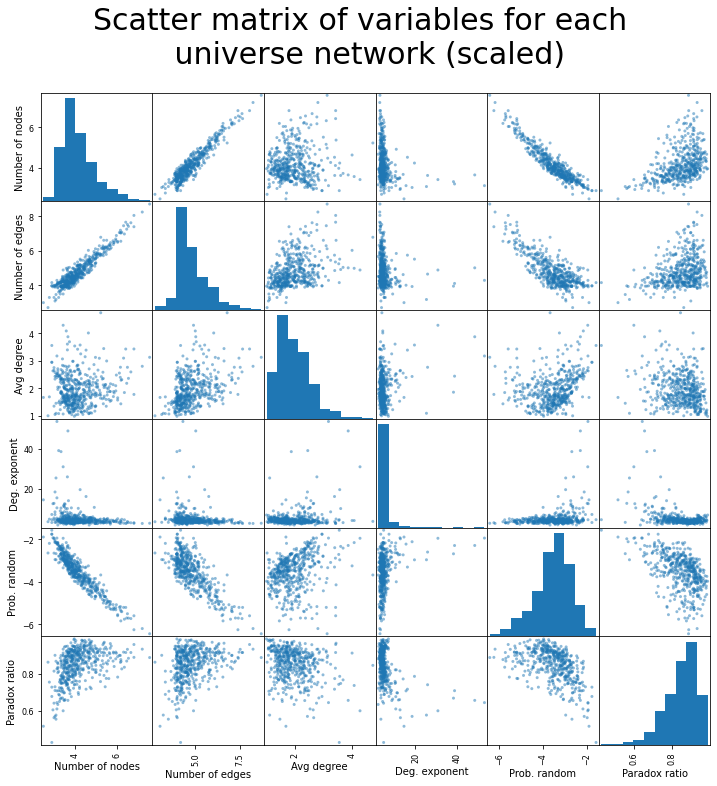

In [75]:
# Scatter matrix after scaling some variables

_ = pd.plotting.scatter_matrix(unidf_scale,figsize=(12,12))
plt.suptitle('Scatter matrix of variables for each \n universe network (scaled)',fontsize=30)
plt.show()

This time, it's much easier to see the relationship between variables. As expected, there is a very strong linear relationship between the number of degrees and the number of nodes in a network. Due to this relationship, it may be benficial to include only one of these variables, due to high correlation between them.

Notice the strong linear relationship between number of nodes and the random probability. If the networks were random, this would make sense: the probability is p = k^(-gamma)/zeta(gamma), so taking the logarithm on both sides (as we have done) will create a linear relationship, up to the constant k/zeta(gamma). For information on the random probability, see [here (equation 4.8)](http://networksciencebook.com/chapter/4#power-laws).

Let's try to fit these variables to the friendship paradox ratio, i.e., the ratio of how often the friendship paradox is true vs. total attempts.

The measurement for goodness of fit we will use is mean squared error.

Feature importance scores:
('Avg degree', 0.158) ('Deg. exponent', 0.435) ('Prob. random', 0.407)
Mean square: 0.0050


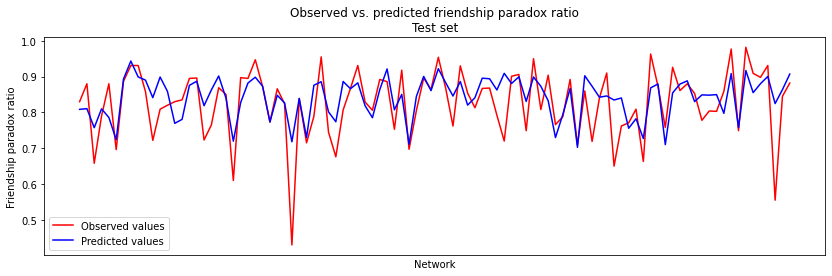

In [76]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt, log

unidf_ml = unidf_re.copy()
unidf_ml.drop(columns=['Number of nodes','Number of edges'],inplace=True)
train, test = train_test_split(unidf_ml,test_size=0.2)

x = unidf_ml.iloc[:,:-1].to_numpy()
y = unidf_ml.iloc[:,-1].to_numpy()
x_train = train.iloc[:,:-1].to_numpy()
y_train = train.iloc[:,-1].to_numpy()

fit = RandomForestRegressor(n_estimators=1000).fit(x_train,y_train)

y_test = test.iloc[:,-1]
x_test = test.iloc[:,:-1]

y_pred = fit.predict(x_test.to_numpy())

def get_feature_importances(columns,importances):
    feature_importances = dict(zip(columns,importances))
    feature_importances = {key:round(value,3) for key,value in feature_importances.items()}
    return feature_importances

feature_importances = get_feature_importances(unidf_ml.columns,fit.feature_importances_)
print('Feature importance scores:')
print(*feature_importances.items())

print(f'Mean square: {mean_squared_error(y_test,y_pred):.4f}')
plt.figure(figsize=(14,4))
plt.plot(y_test,color='red')
plt.plot(y_pred,color='blue')
plt.xlabel('Network'); plt.ylabel('Friendship paradox ratio')
plt.title('Observed vs. predicted friendship paradox ratio\nTest set')
plt.legend(['Observed values','Predicted values'])
plt.xticks([])
plt.show()

We can see that there are some valleys which the model does not reach. However, this prediction is pretty good: a mean squared error of less than 0.05 is very acceptable given that the scale of our predicted variable (friendship paradox ratio) is from 0 to 1.

From the feature importances, we can see that the average degree is not as important as the other variables, as we predicted. Note that the feature importance scores do not add up to 1. However, they are a good measure of the feature importance (as judged by the model) relative to other variables in the model.

We could stop here -- but, there is a trap here in how we handle our model validation process. If we run this code many times, tuning our parameters until our model does well on the test set, then we are running the risk of overfitting the data, because we changed our model until it did well.

What we need to introduce is cross-validation.

Applying a single cross-validation loop can lead to overfitting, because the grid search optimiza-
tion is being run repeatedly on the same cross-validation fold. This can lead to an overly optimistic
estimate of the [expected prediction error](https://math.stackexchange.com/questions/2888788/what-is-expected-prediction-error-epe-a-function-of).

The procedure is as follows: We will define a preset grid of parameters to traverse through in a grid search. This grid search will be performed in a nested cross-validation loop, i.e., a double loop. Using the best estimator obtained from this nested grid search, we will train the estimator on the entire training dataset, and test it on an unseen test set. If we were to apply this model in the real world, the final step would be to train the model on the entire dataset (train and test set).

In [77]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold, train_test_split


K = 5
seed = 1
inner_cv = KFold(n_splits=K, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=K, shuffle=True, random_state=2)
regr = RandomForestRegressor(bootstrap=True, oob_score=True, random_state=seed)'''

# number of trees
n_estimators = range(20,20*5,20)  # The number of trees in the forest
max_depth = list([1,5]) + [None]      # The maximum depth of tree, if none it is specified by min_samples_split or the leaf are pure
max_features = [3,len(uni_df.columns)-1,'auto']   # The number of features to consider when looking for the best split
min_samples_leaf = [1, 4, 8, 50]
min_samples_split = [2, 4, 8, 50]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split
}

'''rf_grid = GridSearchCV(estimator = regr, param_grid = param_grid, cv = inner_cv, 
                       verbose=5, n_jobs=-1)

# n_jobs: The number of jobs to run in parallel. -1 means using all processors 
# verbose: Controls the verbosity when fitting and predicting. How much I want want to see of the tree learning process

# Nested CV
cv_result = cross_validate(rf_grid, X=x_train, y=y_train, verbose=5, n_jobs=-1, scoring='neg_mean_squared_error',
                           cv=outer_cv, return_estimator=True, return_train_score=True,
                          error_score='raise')'''

"rf_grid = GridSearchCV(estimator = regr, param_grid = param_grid, cv = inner_cv, \n                       verbose=5, n_jobs=-1)\n\n# n_jobs: The number of jobs to run in parallel. -1 means using all processors \n# verbose: Controls the verbosity when fitting and predicting. How much I want want to see of the tree learning process\n\n# Nested CV\ncv_result = cross_validate(rf_grid, X=x_train, y=y_train, verbose=5, n_jobs=-1, scoring='neg_mean_squared_error',\n                           cv=outer_cv, return_estimator=True, return_train_score=True,\n                          error_score='raise')"

In [78]:
'''pickle.dump(cv_result,open('cv_result.txt','wb'))'''

"pickle.dump(cv_result,open('cv_result.txt','wb'))"

In [79]:
cv_result = pickle.load(open('cv_result.txt','rb'))

Parameters of the best random forest regressor:
n_estimators: 100
 max_depth: None
 max_features: auto
 min_samples_leaf: 1
 min_samples_split: 2

Feature importance scores:
Avg degree: 0.159
 Deg. exponent: 0.447
 Prob. random: 0.394

Mean squared error: 0.0051


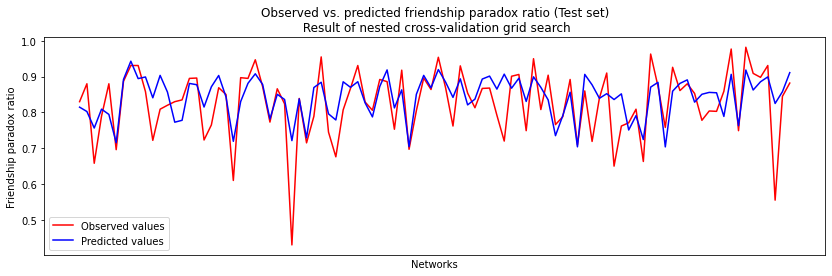

In [80]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # Extract GridSearchCV object which contains the estimator 
    # and parameters
    gridsearchcv = pd.DataFrame(cv_result).sort_values('test_score',ascending=False).iloc[0,2]
    best_estimator = gridsearchcv.estimator
    
    # Perform fit on best estimator
    fit = best_estimator.fit(x_train,y_train)
    # Predict response from test input
    y_pred_rf = fit.predict(x_test)
    
    values = [best_estimator.get_params()[key] for key in param_grid.keys()]
    parameters = (dict(zip(param_grid.keys(),values)))
    parameters = [(f'{key}: {val}\n') for (key,val) in parameters.items()]
    print('Parameters of the best random forest regressor:')
    print(*parameters)
    print('Feature importance scores:')
    feature_importances = get_feature_importances(unidf_ml.columns,fit.feature_importances_)
    feature_importances = [(f'{key}: {val}\n') for (key,val) in feature_importances.items()]
    print(*feature_importances)


print(f'Mean squared error: {mean_squared_error(y_test,y_pred_rf):.4f}')
plt.figure(figsize=(14,4))
plt.plot(y_test,color='red')
plt.plot(y_pred_rf,color='blue')
plt.xlabel('Networks'); plt.ylabel('Friendship paradox ratio')
plt.title('Observed vs. predicted friendship paradox ratio (Test set)\n Result of nested cross-validation grid search')
plt.legend(['Observed values','Predicted values'])
plt.xticks([])
plt.show()

What we gain here from using nested cross-validation is that we now have a robust and unbiased estimate for the expected prediction error. Especially since we tested the final model on an unseen dataset that was not used in any way during model selection.

We experimented with a multitude of variables to try to predict the friendship paradox ratio. We tried counting how many nodes had a degree above a certain threshold, like 10 or 50. The idea behind that was that if there are many nodes with high degrees, the friendship paradox is more likely to be true.

It's interesting that the probability of a random network with the network's number of nodes and the network's average degree is such a powerful predictor, since, as per our conclusions in earlier chapters, the networks clearly follow a power law.

This is especially interesting considering that we tried also calculating the $p_k=k^{-\gamma}$ using the network's degree exponent $\gamma$, but this also proved utterly fruitless as a predictor.

But wait - the network of all universes was in the scale-free regime! What's going on here? The networks sorted by number of nodes in ascending order:

In [81]:
unidf_re_sorted = unidf_re.sort_values(by="Number of nodes",ascending=True)
unidf_re_sorted.head(10).round(decimals=1)[['Number of nodes','Deg. exponent']]

,Number of nodes,Deg. exponent
Earth-TRN835,12,14.4
Earth-2992,15,3.5
Earth-TRN874,16,4.8
Earth-12151,18,4.6
Earth-49487,18,7.2
Earth-1003,18,3.2
Earth-11053,19,12.5
Earth-985,20,4.5
Earth-90559,20,12.7
Earth-597,20,5.4


And in descending order:

In [82]:
unidf_re_sorted = unidf_re.sort_values(by="Number of nodes",ascending=False)
unidf_re_sorted.head(10).round(decimals=1)[['Number of nodes','Deg. exponent']]

,Number of nodes,Deg. exponent
Earth-199999,1965,2.8
Earth-1610,1379,2.7
Earth-9997,925,2.8
Earth-928,925,3.0
Earth-92131,798,3.0
Earth-9047,711,3.1
Earth-12041,677,3.7
Earth-982,654,3.0
Earth-295,624,2.6
Earth-58163,585,4.5


But here we see that the networks with a high number of nodes are closer to the scale-free regime (many have a degree exponent below 3). We hypothesize that the networks with few nodes don't have enough nodes for a scale-free structure to form; they still look like random networks.

Let's count how many networks are in the random regime (with degree exponent > 3) vs. total number of networks:

In [83]:
degree_exponents = [value[-3] for key,value in universe_tests.items()]
len_nodes = [value[0] for key,value in universe_tests.items()]
print('How many networks are in the random regime vs. total number of networks:\n')
print('Random regime networks:',np.sum(np.sort(degree_exponents)>3),'; Total number of networks:', len(degree_exponents))

How many networks are in the random regime vs. total number of networks:

Random regime networks: 438 ; Total number of networks: 489


So the probability of random networks is significant as a predictor in the random regression model because most of these networks ARE random!

### SENTIMENT ANALYSIS

#### Sentiment analysis of characters in Earth-616 

We start by getting the data. The previously made network of Earth-616 universe is read in with the pickle module:

In [84]:
# Read in the Earth-616 network
E616 = pickle.load(open('Earth-616_Network_Undirected_All_pickle.txt','rb'))

# # Display it?
# nx.draw(E616)
# plt.show()

All characters are descriptions are then read in the same way: 

In [85]:
descriptions = pickle.load(open('Marvel_Character_Descriptions_pickle.txt','rb'))

##### Chapter name analysis 
We will check a few examples from descriptions of characters in different chapters/universes:

In [86]:
print(descriptions["'Lectron (Earth-12772)"])

{{Marvel Database:Character Template
| Image                   = 'Lectron_(Earth-9602)_(Earth-9602)_from_Spider-Boy_Team-Up_1_0001.jpg
| Name                    = 
| CurrentAlias            = 'Lectron
| Aliases                 = 

| Affiliation             = {{m|Legion of Galactic Guardians 2099 (Earth-12772)|Legion of Galactic Guardians 2099}}
| Relatives               = 
| MaritalStatus           = 

| CharRef                 = 
| Gender                  = Male
| Height                  = 
| Weight                  = 
| Eyes                    = 
| Hair                    = 
| UnusualFeatures         = 

| Origin                  = Merged form of [[Maxwell Dillon (Earth-616)|Electro]] & [[w:c:DC:Garth Ranzz (Post-Zero Hour)|Live Wire]]
| Reality                 = Earth-12772
| PlaceOfBirth            = 

| Identity                = Secret
| Citizenship             = 
| Occupation              = Adventurer
| Education               = 
| BaseOfOperations        = 

| Creators          

In [87]:
print(descriptions['Anthony Stark (Earth-616)'])

{{Marvel Database:Character Template
| Image                   = Iron Man Vol 6 1 Brooks Variant Textless.jpg
| Name                    = [[Tony Stark|Anthony Edward "Tony" Stark]]
| CurrentAlias            = [[Iron Man]]
| EditorialNames          = Formerly [[Tony Stark: Iron Man Vol 1|Tony Stark: Iron Man]], [[Invincible Iron Man]], [[International Iron Man Vol 1|International Iron Man]], [[Superior Iron Man Vol 1|Superior Iron Man]], [[Iron Man: Director of S.H.I.E.L.D. Annual Vol 1|Iron Man: Director of S.H.I.E.L.D.]]
| Aliases                 = [[Actor]],{{r|Tales of Suspense Vol 1 42}} Anthony of York,{{r|Iron Man Vol 3 59}} Antony,{{r|Iron Man: Director of S.H.I.E.L.D. #29}} Armored Avenger,{{r|Deadpool Vol 5 #7}} Bullet-Head,{{r|Tales of Suspense Vol 1 54}} Boss Man,{{r|Captain Marvel Vol 6 5}} Brass Man,{{r|Avengers: The Initiative Vol 1 4}} [[Crimson Dynamo]],{{r|Iron Man Vol 1 317}} [[Cobalt Man]],{{r|Avengers/Thunderbolts Vol 1 4}} Director Anthony Stark,{{r|Avengers: The I

It is seen that they have some structure with reoccuring layout of `| ChapterName` which also includes *newline* before and *whitespace* after it. But the characters have some inconsistentcy with them like from above example `Anthony Stark (Earth-616)` has `Overview` but `'Lectron (Earth-12772)` does not. For that it is necessary to know which of those are most consistent and then pick those that have the most regular text in them and not only a few words with high repetition across the characters.

In [88]:
# Find all chapter names for all characters in Earth-616
attributeList = []
for k,v in descriptions.items():
    # Find all patterns like 'newline| chapter_name ' in each of the descriptions
    attributeList.append(re.findall('\n\|\s(\S+)', v))

# Put them all in a flattened list
attributeList = [item for sublist in attributeList for item in sublist]

In [89]:
# Count occurences of unique values
df = pd.DataFrame(data=np.array(np.unique(attributeList, return_counts=True)).T, columns=['Attribute', 'count'])
df['count'] = pd.to_numeric(df['count'])
# Sort them and show
df = df.sort_values(by=['count'], ascending=False)
df

,Attribute,count
112,Identity,73558
14,BaseOfOperations,73553
151,Origin,73551
41,Creators,73551
4,Affiliation,73551
...,...,...
111,I'm,1
114,Identity3,1
115,If,1
120,Image4,1


In [90]:
# Make plotly graph about occurences of paragraph titles
hover_data={'count': False}
fig = px.scatter(df, x='Attribute', y='count', hover_data=hover_data)

# Add title and axis titles
fig.update_layout(title="Occurrances of different Chapter names")
fig.update_layout(xaxis_title="Chapter names", yaxis_title="Occurences")

fig.show()


From those results and looking a bit around in Marvel's Wiki it can be concluded that `Trivia` and `History` are probably the best paragraphs to look into as they have a lot of original text. Other paragraphs might often have just a common sentence of redirecting to some other character or other universe counterpart (often case with abilities and weaknesses). Although it has to be kept in mind that sometimes paragraphs are there but just empty.

##### Separating and cleaning up the `History` and `Trivia` texts

For choosing the paragraph the description can be split on the beginning of paragraph using paragraphs name and have the next split when any paragraph starts.

In [91]:
# Find right chapter, split it there and chose the 1th part if possible
# Then split according to the chapter beginnings and choose the 0th part
# Finally remove 18 whitespaces and an equals sign (=) at the beginning of the string
# If relevant chapter is not available, return empty string ('') instead
def getHistoryAndTrivia(txt):
    history = ''
    trivia = ''
    if '\n| History' in txt:
        history = txt.split('\n| History')[1].split('\n| ')[0][19:]
    if '\n| Trivia' in txt:
        trivia = txt.split('\n| Trivia')[1].split('\n| ')[0][19:]
    return history, trivia

_, TonyTxt = getHistoryAndTrivia(descriptions["Anthony Stark (Earth-616)"])
print(TonyTxt[:500] + '...')

 * Stan Lee based Stark's personality on [[wikipedia:Howard Hughes|Howard Hughes]], explaining, "Howard Hughes was one of the most colorful men of our time. He was an inventor, an adventurer, a multi-millionaire, a ladies man and finally a nutcase."<ref>"Bullpen Bulletins" (Dec. 1997 Marvel Comics): "Stan's Soapbox" (column), by Stan Lee</ref>
* "Stark" means "strong" in several languages, including German and Swedish.
* 2011's {{cl|Invincible Iron Man Vol 1 500}} established Tony to be 35 years...


The text contains a lot of weird syntax for redirecting pages and references. It is important to handle those and turn the text into normal, cleaned, human-readable text for sentiment analysis. Code cell below has a function for exactly that with comments of describing what each part does. The previous text example is cleaned using this so the results can be seen.

In [92]:
# Function that remains the text part when cleaning double-square-brackets things
# Has to work with empty strings too
def LoseSqrBr(matchobj):
    # Input is a machobject (basically list) with one string element
    # String is in a shape '[[...]]' and might contain '|' as separator for diferent parts

    # Remove 2 first and last chars of the sting because they are '[[' and ']]' respectively
    # Split matchobject on '|' and choose last element (that contains actual text)
    return matchobj[0][2:-2].split('|')[-1]

def NormalTxt(txt):
    # Get rid of double-square-brackets things, '[[...]]'
    txt = re.sub('\[\[.*?\]\]', LoseSqrBr, txt)

    # Get rid of double-wavy-brackets things, '{{...}}'
    txt = re.sub('\{\{.*?\}\}', '', txt)

    # Get rid of '<ref>...</ref>' things
    txt = re.sub('\<ref\>.*?\<\/ref\>', '', txt)
    
    # Get rid of '<center>...</center>' things
    txt = re.sub('\<center\>.*?\<\/center\>', '', txt)

    # Get rid of subparagraph '===...===' things
    txt = re.sub('\=\=\=.*?\=\=\=', '', txt)

    # Some weird double-nested wavy-bracket references produced things like '-5}}' so lets get rid of those
    txt = re.sub('\-\d\}\}', '', txt)

    return txt

print(NormalTxt(TonyTxt)[:500] + '...')

 * Stan Lee based Stark's personality on Howard Hughes, explaining, "Howard Hughes was one of the most colorful men of our time. He was an inventor, an adventurer, a multi-millionaire, a ladies man and finally a nutcase."
* "Stark" means "strong" in several languages, including German and Swedish.
* 2011's  established Tony to be 35 years old. By implementing the ratio of passage of time established by the Marvel Sliding Timescale, that would mean he became Iron Man when he was approximately 23 ...


Now is time to gather all the Earth-616 characters in a pandas dataframe and assign them their texts.

In [93]:
df = pd.DataFrame(index=list(E616), columns=['History', 'Trivia'])

for character in list(E616):
    history, trivia = getHistoryAndTrivia(descriptions[character])
    df.loc[character] = [NormalTxt(history), NormalTxt(trivia)]
df

,History,Trivia
'Spinner (Earth-616),'Spinner was a member of the the Galactic Alli...,
01100010 01110010 01110101 01110100 01100101 (Earth-616),Brute was a very old military robot still runn...,"* Brute only speaks in zeroes and ones, so hi..."
Cosmo (Dog) (Earth-616),\n\n'''Cosmo''' was formerly a test animal for...,"* According to the Xandarian Worldmind, Cosmo..."
Rocket Raccoon (Earth-616),"\n\n\n\nCenturies ago, a group of alien humano...","* Rocket once attempted to make ""Blam! I murd..."
107 (Earth-616),107 was one of over a hundred runaways abducte...,
...,...,...
Zuwena (Earth-616),Zuwena was the director of Wakanda's Extractio...,
Zygo (Earth-616),Zygo was a general in the Rigellian Empire who...,
Zyro (Earth-616),"Zyro was one of the Kree sent to Earth, alongs...",
Zyziwc Tiel (Earth-616),Zyzic Tiel was a Centurian of the Nova who ans...,


#### LabMT analysis

Lets do LabMT sentiment analysis now, which is dictionary based analysis.

In [94]:
LabMT = pd.read_csv('Data_Set_S1.txt', sep="\t", skiprows=3, usecols=['word', 'happiness_average'], index_col='word')
LabMT

,happiness_average
word,
laughter,8.50
happiness,8.44
love,8.42
happy,8.30
laughed,8.26
...,...
murder,1.48
terrorism,1.48
rape,1.44


Make a function that prepares text for LabMT sentiment analysis (lowercase, tokenization and lemmatization) and test it.

In [95]:
# Function to prepare text for LabMT analysis 
def prepare_LabMT(text):
    #Make all words lowercase
    text = text.lower()

    #Get rid of weird symbols
    #text = re.sub("[^a-zA-Z0-9, \ , \']+", "", text)

    #Tokenize 
    tk = RegexpTokenizer(r'\w+') 
    text = tk.tokenize(text)
    
    #Get word-stem
    wnl = nltk.WordNetLemmatizer()
    text = [wnl.lemmatize(t) for t in text]
    
    return text

print('Example:\n')
print(df.loc['Anthony Stark (Earth-616)', 'Trivia'][:900] + '...\n')
print(prepare_LabMT(df.loc['Anthony Stark (Earth-616)', 'Trivia'])[:300])

Example:

 * Stan Lee based Stark's personality on Howard Hughes, explaining, "Howard Hughes was one of the most colorful men of our time. He was an inventor, an adventurer, a multi-millionaire, a ladies man and finally a nutcase."
* "Stark" means "strong" in several languages, including German and Swedish.
* 2011's  established Tony to be 35 years old. By implementing the ratio of passage of time established by the Marvel Sliding Timescale, that would mean he became Iron Man when he was approximately 23 years old. Despite Tony celebrating a birthday in 2013's  and a documented passage of time of eight months before and after 2015's ''Secret Wars'', 2016's  posits Tony's birth between 35 and 34 years into the past, which would mean he became Iron Man when he was approximately 21 years old.
* In-universe, the exploits of Iron Man (like those of many heroes), are adapted by Marvel Comics in authoriz...

['stan', 'lee', 'based', 'stark', 's', 'personality', 'on', 'howard', 'hughes', 'expl

Now it is needed to find LabMT score for a list of tokens. Below function does that and also finds the standard diviation of the words within the list too. Test run is shown on the previous example.

In [96]:
# Make function to calculate sentiment score based on LabMT
def LabMT_sentiment(lst_of_tokens):
    # Initialise list for values of each word
    lst_of_values = []
    for token in lst_of_tokens:
        # If possible append value to lst_of_values, otherwise skip one loop
        if token in LabMT.index:
            lst_of_values.append(LabMT.loc[token, 'happiness_average'])
        else:
            continue
    # Convert list of values to numpy array
    values_np = np.array(lst_of_values)
    # Return mean sentiment score and std unless number of tokens is too low in LabMT dataset
    return (np.mean(values_np) if len(values_np)>0 else np.NaN , np.std(values_np) if len(values_np)>2 else np.NaN)

print('Example run: ', LabMT_sentiment(prepare_LabMT(df.loc['Anthony Stark (Earth-616)', 'Trivia'])))

Example run:  (5.4544079885877315, 0.749503382242698)


Now this can be done for all the characters in the whole Earth-616 universe.

*Note: when running the previously made functions for the whole table of characters in Earth-616 the functions are going to take a few minutes.*

##### LabMT scores of characters' History paragraphs

First let's take into consideration only the History texts.


In [97]:
'''
df[['History_mean', 'History_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['History'])), axis=1, result_type='expand')
pickle.dump(df, open('Earth-616_df_History_pickle.txt', 'wb'))
'''

"\ndf[['History_mean', 'History_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['History'])), axis=1, result_type='expand')\npickle.dump(df, open('Earth-616_df_History_pickle.txt', 'wb'))\n"

In [98]:
df = pickle.load(open('Earth-616_df_History_pickle.txt','rb'))


Now it would be nice to plot the distribution of the calculated scores. This is done using two different bin-counts in histograms.


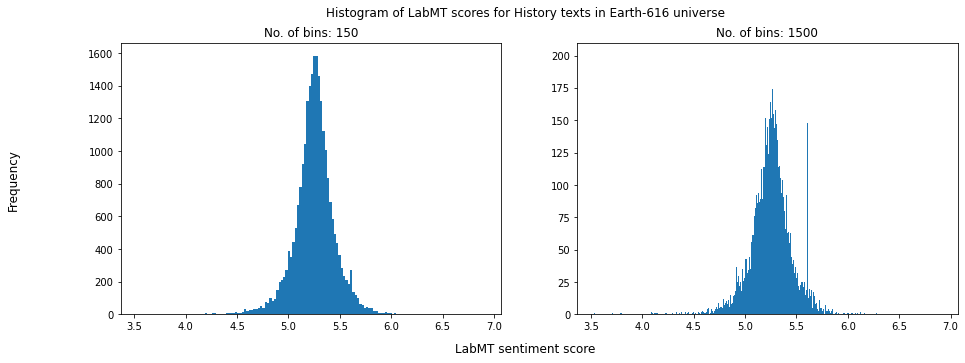

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(2):
    bins = 15*10**(i+1)
    title = 'No. of bins: ' + str(bins)
    _ = df['History_mean'].plot(kind='hist', bins=bins, ax=axes[i], title=title)
    axes[i].set_ylabel('')
_ = fig.supxlabel('LabMT sentiment score')
_ = fig.supylabel('Frequency')
_ = fig.suptitle('Histogram of LabMT scores for History texts in Earth-616 universe')


It can be seen that overall the results have fairly nice **Gaussian** looking distribution, indicated by the graph with lower bin-count. Although, when looking at the graph with higher bin-count, it can be right away seen that there is some annomaly present there around the score value of **5.6**. As each bin on this graph covers really small range of score values, it can be that most the values in that bin have the **exact** same value. It is worth thinking that there is some **error** in the analysis or something else is fishy.

##### Annomaly investigation within distribution

To further investigate the phenomena, the frequancy for individual values are found within the results using both mean and standard deviation values. Then it would be nice to see some of the original texts for the most common values and then reflect from that.


In [100]:
top = 3
dfTop = pd.DataFrame(df[['History_mean', 'History_std']].value_counts(), columns=['counts'])
#dfTop.name = 'counts'

print('Top{} of the common scores are shown below with examples of initial text:\n'.format(top))

for i in range(top):
    commonMean, commonStd = dfTop.index[i]
    counts = dfTop['counts'].iloc[i]
    print(top, 'examples of character History texts that had:')
    print('* mean sentiment of {},'.format(commonMean))
    print('* standard deviation of {},'.format(commonStd))
    print('* {} occurences.'.format(counts))
    print(df.loc[(df['History_mean']==commonMean) & (df['History_std']==commonStd), 'History'].iloc[:top], '\n')


Top3 of the common scores are shown below with examples of initial text:

3 examples of character History texts that had:
* mean sentiment of 5.61,
* standard deviation of 1.151282838364684,
* 135 occurences.
Abbadona (Angel) (Earth-616)    '''Abbadona''' was an angel living in Heaven.<...
Agares (Earth-616)              '''Agares''' was an angel living in Heaven.<!-...
Amezyarak (Earth-616)           '''Amezyarak''' was an angel living in Heaven....
Name: History, dtype: object 

3 examples of character History texts that had:
* mean sentiment of 5.007837837837838,
* standard deviation of 0.8390442926656401,
* 29 occurences.
Afropool (Earth-616)     Afropool was one of the many clones of Deadpoo...
Bathpool (Earth-616)     Bathpool was one of the many clones of Deadpoo...
Beardpool (Earth-616)    Beardpool was one of the many clones of Deadpo...
Name: History, dtype: object 

3 examples of character History texts that had:
* mean sentiment of 5.288899082568808,
* standard deviation of

It can be seen that the problem is not rather because of error in analysis or bad cleaning of the text but because of two reasons how the articles have been written:

1. Texts have been written in the wiki about some side-characters that share similar history - there is not much to talk about them and their story is similar.

2. Texts have been written in the wiki about some clone or model characters that originate all from one the same character. Again as they are less known characters there is not much to write about them and their story is similar.

In conclusion of this annomaly it can be said that it was naturally happening phenomenon within Wiki pages due to several similar characters, that **do not have much text** about them, sharing **same tamplate text** on their pages. It is also worth mentioning that the biggest annomaly of 135 characters with same sentiment score of 5.61 happened to be **angels/heavenly creatures**, meaning they have abnormaly more positive score about them than the average character has (`heaven` has LabMT sentiment score of **7.86** and `angel` has **7.68**). Due to this it was more noticable than the second and third most common scores that have way more central values in the distribution (the bin icluding score value of 5.007837837837838 is barely noticable in the graph with higher bin count).


##### Min, max, median, mean

Furthermore it would be interesting to see the best-worst-average sentiment score characters and their texts.


In [101]:
# Function that helps to print out min, max and median nicely of given column
def getStatsText(df, textName, funct):
    # Find the line where is min/max/median from given column mean values
    if funct == "minimum":
        dfTemp = df.loc[df[textName+'_mean']==df[textName+'_mean'].min()]
    elif funct == "maximum":
        dfTemp = df.loc[df[textName+'_mean']==df[textName+'_mean'].max()]
    elif funct == "median":
        # If the amount of not NaN datapoints is odd then median works fine
        # but if it is even then it might not work (if two median values are not the same).
        # For the prevention of this we just exclude first not NaN datapoint
        # if the amount of not NaN datapoints is even.
        if len(df[textName+'_mean'].dropna())%2 == 1:
            dfTemp = df.loc[df[textName+'_mean']==df[textName+'_mean'].median()]
        else:
            notNanMask = df[textName+'_mean'].dropna().iloc[1:]==df[textName+'_mean'].dropna().iloc[1:].median()
            dfTemp = df.dropna(subset=[textName+'_mean']).iloc[1:].loc[notNanMask]
    else:
        raise Exception("Function type funct has to be string of 'minimum', 'maximum' or 'median'")
        return
    
    # Print out the min/max/median score and who it belongs to
    print('The character with {} {} score of {} is {}.'.format(funct, textName, dfTemp[textName+'_mean'].iloc[0], dfTemp.index[0]))

    # Print out their text nicely
    print('Their Wikitext is as follows:')
    pprint(re.sub('\n', '', dfTemp[textName].iloc[0]))

In [102]:
# Find minimum character
getStatsText(df, 'History', 'minimum')
print()

# Find maximum character
getStatsText(df, 'History', 'maximum')

The character with minimum History score of 3.536 is Forgotten (Collective) (Earth-616).
Their Wikitext is as follows:
'The Forgotten defeated and killed Merlin.'

The character with maximum History score of 6.8999999999999995 is Sofia Torres (Earth-616).
Their Wikitext is as follows:
'Sofia Torres loved bedtime stories about super-heroes.'


Again, those results have the common theme of having only a **little amount of text** written about them so a few bad/good words have much influence on the average score for the character.

Next up let's see some more common texts using median and mean. As mean is not the exact value from the dataframe, it is necessary to look the closest values (on absolute scale) to the mean.

In [103]:
# Function that helps to print out mean nicely of given column 
def getMeanText(df, textName):
    # Find mean score
    meanScore = df[textName+'_mean'].mean()
    # Rearange and save dataframe according to how close they absolutely are to the mean value
    # As .argsort() and .iloc[] misbehave when dealing with NaN values the .dropna() method is used to make it work
    dfTemp = df.dropna(subset=[textName+'_mean']).iloc[(df[textName+'_mean'].dropna()-meanScore).abs().argsort()]
    # Save the closest value to the mean
    closestMean = dfTemp[textName+'_mean'].iloc[0]

    # Print out the text type, mean score and who is closest to it
    print('The character with closest to the mean {} score of {} is {}'.format(textName, meanScore, dfTemp.index[0]))
    # Print out their score and how much they are off by the mean (on absolute scale again)
    print('with sentiment score of {} (off by {}).'.format(closestMean, np.abs(closestMean-meanScore)))

    # Print out their text in a nice way
    print('Their Wikitext is as follows:')
    pprint(re.sub('\n', '', dfTemp[textName].iloc[0]))

In [104]:
# Find median character
getStatsText(df, 'History', 'median')
print()

# Find closest to mean character
getMeanText(df, 'History')

The character with median History score of 5.256 is Amy Keats (Earth-616).
Their Wikitext is as follows:
'Amy Keats was kidnapped by Gunther Gyles outside the schoolyard.'

The character with closest to the mean History score of 5.251975774924061 is Michael McTeer (Earth-616)
with sentiment score of 5.251975308641976 (off by 4.662820849432592e-07).
Their Wikitext is as follows:
('Michael McTeer, just before discovering the Castle family murder '
 'scene.Michael McTeer was a drunk freelance reporter who mainly worked for '
 'the Daily Bugle. While recovering from a drunken stupor, he ended up being '
 "the first one to discover Frank Castle's family and Forrest Hunt, after they "
 'were murdered in Central Park. While being interrogated on the fact by '
 'detective John Laviano, who held a grudge against him for his alcoholism and '
 'his amoral working methods, he was smashed in the face by Castle, who had '
 'survived the shooting and was in a state of shock.McTeer, searching for a '


Again median result follows the previously recognised pattern - **short text**. But interestingly it is rather **negative sentence** in a sense that the character was *kidnapped* but still ended up as a central example of the distribution.

Then again looking for the average character the result is a bit different than the previous ones - this character has way **more text** written about them. But interestingly enough it has the same contridictorary - the text is with rather **negative sentiment in reality** (a lot about **alcoholism, murder, grudge and death**). Although there are some positive words like **"family"** or **"success"**, they are actually mentioned in a negative context ("family murder scene" and "lack of success"). This depicts nicely a dictionary based sentiment analysis flaw - even texts with central values of calculated sentiment scores can have rather negative sentiment in reality.

##### LabMT scores of characters' Trivia paragraphs

Now let's do the same with Trivia texts. The methods are mainly same so descriptions of how things are done are only included if something is done differently.



In [105]:
'''
df[['Trivia_mean', 'Trivia_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['Trivia'])), axis=1, result_type='expand')
pickle.dump(df, open('Earth-616_df_Trivia_pickle.txt', 'wb'))
'''

"\ndf[['Trivia_mean', 'Trivia_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['Trivia'])), axis=1, result_type='expand')\npickle.dump(df, open('Earth-616_df_Trivia_pickle.txt', 'wb'))\n"

In [106]:
df = pickle.load(open('Earth-616_df_Trivia_pickle.txt','rb'))


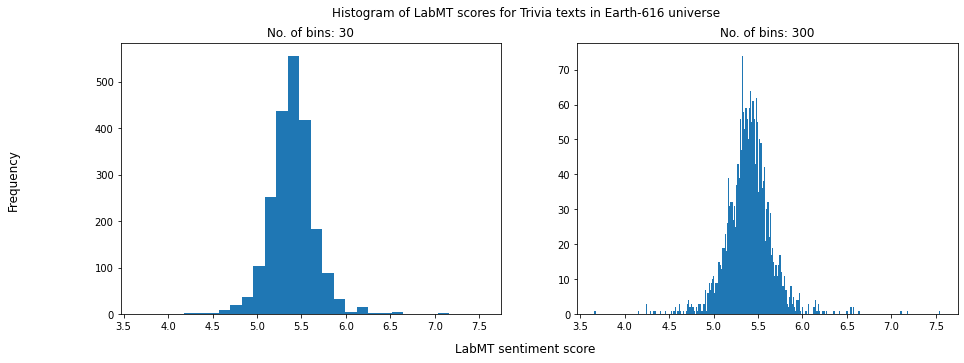

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(2):
    bins = 3*10**(i+1)
    title = 'No. of bins: ' + str(bins)
    _ = df['Trivia_mean'].plot(kind='hist', bins=bins, ax=axes[i], title=title)
    axes[i].set_ylabel('')
_ = fig.supxlabel('LabMT sentiment score')
_ = fig.supylabel('Frequency')
_ = fig.suptitle('Histogram of LabMT scores for Trivia texts in Earth-616 universe')


This time the bin-counts have been chosen a bit differently as there is less data in Trivia section. It can be seen that overall the results have again (like also for History texts) fairly nice **Gaussian** looking distribution, indicated by the graph with lower bin-count. It seems that the distribution has a small overall shift towards higer values compared to History text distribution. The higher bin-count graph shows again some potential for several exact same values (around **5.1** and **5.25**), similarly to the previous analysis.

##### Annomaly investigation within distribution


In [108]:
top = 3
dfTop = pd.DataFrame(df[['Trivia_mean', 'Trivia_std']].value_counts(), columns=['counts'])
#dfTop.name = 'counts'

print('Top{} of the common scores are shown below with examples of initial text:\n'.format(top))

for i in range(top):
    commonMean, commonStd = dfTop.index[i]
    counts = dfTop['counts'].iloc[i]
    print(top, 'examples of character Trivia texts that had:')
    print('* mean sentiment of exactly {},'.format(commonMean))
    print('* standard deviation of {},'.format(commonStd))
    print('* {} occurences.'.format(counts))
    print(df.loc[(df['Trivia_mean']==commonMean) & (df['Trivia_std']==commonStd), 'Trivia'].iloc[:top], '\n')


Top3 of the common scores are shown below with examples of initial text:

3 examples of character Trivia texts that had:
* mean sentiment of exactly 5.573333333333333,
* standard deviation of 0.7801994047108155,
* 6 occurences.
Abraham James (Earth-616)        * The Marvel Universe version of a character ...
Basil Mendelsohn (Earth-616)     * The Marvel Universe version of a character ...
Gardner Polley (Earth-616)       * The Marvel Universe version of a character ...
Name: Trivia, dtype: object 

3 examples of character Trivia texts that had:
* mean sentiment of exactly 5.323636363636364,
* standard deviation of 0.3759901528515371,
* 4 occurences.
Benjamin Grimm (Skrull, Cow) (Earth-616)     * Dorrek VII is related to one of the three w...
H. Warren Craddock (Skrull) (Earth-616)      * Dorrek VII is related to one of the three w...
Jonathan Storm (Skrull, Cow) (Earth-616)     * Dorrek VII is related to one of the three w...
Name: Trivia, dtype: object 

3 examples of character Trivia

It can be seen again that the problem is not rather because of error in analysis or bad cleaning of the text but because of the reason that some characters **share similar story and do not have much text about them** so they also share same Trivia notes. When going to the Marvel Database one can really see that some charecters can share **exactly same Trivia** texts (example links: [Benjamin Grimm (Skrull, Cow) (Earth-616)](https://marvel.fandom.com/wiki/Benjamin_Grimm_(Skrull,_Cow)_(Earth-616)?so=search), [H. Warren Craddock (Skrull) (Earth-616)](https://marvel.fandom.com/wiki/H._Warren_Craddock_(Skrull)_(Earth-616)?so=search), [Jonathan Storm (Skrull, Cow) (Earth-616)](https://marvel.fandom.com/wiki/Jonathan_Storm_(Skrull,_Cow)_(Earth-616)?so=search))

As the maximum number of occurences with exactly the same mean and std values was 6 this time, we cannot say that any of the abnormally higher peaks correspond to those reasons, and all we have to conclude is that there are sometimes more **similar** values within one bin, even if the bins are really thin.


##### Min, max, median, mean

In [109]:
# Find minimum character
getStatsText(df, 'Trivia', 'minimum')
print()

# Find maximum character
getStatsText(df, 'Trivia', 'maximum')

The character with minimum Trivia score of 3.66 is Bentley Wittman (Earth-616).
Their Wikitext is as follows:
' * The Wizard hates marzipan.'

The character with maximum Trivia score of 7.55 is Lauri-Ell (Earth-616).
Their Wikitext is as follows:
' * Lauri-Ell likes flowers.'


Again, those results have the common theme of having only a **little amount of text** written about them so a few bad/good words have much influence on the average score for the character.

In [110]:
# Find median character
getStatsText(df, 'Trivia', 'median')
print()

# Find closest to mean character
getMeanText(df, 'Trivia')

The character with median Trivia score of 5.398666666666667 is Amazo (Earth-616).
Their Wikitext is as follows:
(' Other non-magical stage or carnival magicians:Moudini,Mysto the '
 'Magician,Marko(Terry Vance '
 'foe)http://marvel.wikia.com/Marvel_Mystery_Comics_Vol_1_55,Master '
 'Magician(Tehru) and the Trump(Carlton Sanders).')

The character with closest to the mean Trivia score of 5.397810217171828 is Anthony Masters (Earth-616)
with sentiment score of 5.397682926829269 (off by 0.00012729034255887228).
Their Wikitext is as follows:
(" * Daredevil once saved Taskmaster's life when the Punisher threw a knife at "
 'his heart. Daredevil deflected it with a shot from a pistol, then applied '
 'pressure to his wound until help arrived, one of the few times the hero has '
 'ever picked up and used a firearm.* Taskmaster wore a skull mask as inspired '
 'by Santa Muerte, Saint Death "The Lady of Shadows" in honor of her '
 'solidarity. He picked up this mask on his first mission for Org

Both median and mean value characters have Trivia texts with fairly decent actual sentiment. Although `Anthony Masters (Earth-616)` has text about **"wound", "pistol" and "death"**, they also have text about **"good friendship" and how "hero" saves the day** and therefore the text ends up being the average sentiment text (with score of **~5.4**) in Earth-616 universe Trivia texts. 


#### Popular characters




In [111]:
# Put History and Trivia together
df['Combined'] = df['History'] + ' ' + df['Trivia']

'''
# Find each sentiment score for Combined text
df[['Combined_mean', 'Combined_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['Combined'])), axis=1, result_type='expand')

pickle.dump(df, open('Earth-616_df_Combined_pickle.txt', 'wb'))
'''

"\n# Find each sentiment score for Combined text\ndf[['Combined_mean', 'Combined_std']] = df.apply(lambda row: LabMT_sentiment(prepare_LabMT(row['Combined'])), axis=1, result_type='expand')\n\npickle.dump(df, open('Earth-616_df_Combined_pickle.txt', 'wb'))\n"

In [112]:
df = pickle.load(open('Earth-616_df_Combined_pickle.txt','rb'))


In [113]:
# Get each combined text length and sort by it.
# Then choose topX and store their names.
topX = 150
topXlist = df.sort_values(by="Combined", key=lambda x: x.str.len(), ascending=False).iloc[:topX].index.tolist()

# Save only selected columns
dfPop = df.loc[topXlist][['History', 'Trivia', 'Combined_mean']]

# Cut down the text sizes as they are no longer needed for analysis and this way better shown on graph
dfPop['History'] = dfPop['History'].str[:60]
dfPop['Trivia'] = dfPop['Trivia'].str[:60]


In [114]:
distY, distX = np.histogram(df['Combined_mean'].dropna().tolist(), bins=300)
distX = (distX[:-1]+distX[1:])/2.0


In [115]:
# Function to find closest value in array and it's index
def find_nearest(array, value):
    # Make sure that input array is numpy array
    array = np.asarray(array)
    # Find closest value index
    idx = (np.abs(array - value)).argmin()
    # Return closest value and its index
    return array[idx], idx

# Function to find the closest y value knowing line's x and y values
def get_dist_value(x, X, Y):
    # Get nearest x-point and it's index in distribution
    y, i = find_nearest(X, x)
    # Generate jitter
    jitter = (np.random.rand(1)[0]-0.5)*80
    # Return according y value from the distribution with added jitter
    return Y[i] + jitter

# Make y values according to the distribution
dfPop['Distribution'] = dfPop.apply(lambda row: get_dist_value(row['Combined_mean'], distX, distY), axis=1)


In [116]:
dfPop['Popularity'] = range(1, topX+1)

In [117]:
# Make distribution as line graph
fig1 = px.line(x=distX, y=distY)
# Make line red and remove hover box
fig1.update_traces(line=dict(color = 'rgba(250,50,50,0.7)'), hovertemplate=None, hoverinfo='skip')

# Make Pop characters as scatter plot
# Choose what to show in hover box
hover_data={'Combined_mean': False, 'Distribution': False, 'History': True, 'Trivia': True, 'Popularity': True}
fig2 = px.scatter(dfPop, x='Combined_mean', y='Distribution', hover_data=hover_data, hover_name=dfPop.index)

# Combine figures
fig3 = go.Figure(data=fig1.data + fig2.data)
# Add title and axis titles
fig3.update_layout(title="Distribution of the Combined text sentiment scores (red) and Top{} longest texts (blue)".format(topX))
fig3.update_layout(xaxis_title="LabMT sentiment score", yaxis_title="Relative density")
# Determine first x axis range
fig3.update_xaxes(range=[5.13, 5.44])

#fig3.write_html("WEBPAGE CONTET/sentiment distribution with TopPop.html")
fig3.show()


The graph above is interactive - meaning that it can be panned and zoomed + when hovering cursor above datapoints it shows relevant information about them (name of character, popularity of character/length of their text placement and a short part from the beginning of their History and Trivia paragraphs). It is important to mention that the distribution curve (red line) is zoomed in on x axis and the whole distribution can be seen when clicked on the 'Autoscale' button on upper right corner - apparently all the characters that have lengthy text about them have fairly central sentiment score.

With that mentioned, it is time to investigate characters separately. Using the hovering interactivity we can see that several evil characters are on the left side of our sentiment scale meaning they have more negative sentiment (examples of popular evil characters: **Frank Castle a.k.a The Punisher, Venom (Symbiote), Edward Brock a.k.a Eddy, Wolfgang von Strucker (Hydra Leader), Victor Creed a.k.a Sabertooth**). And on the other end we find rather passionate characters who are more related to romance or good side (popular examples from that side consist: **Hope Summers (X-men), Mary Jane Watson a.k.a MJ, Robert Drake a.k.a Iceman (X-men), Jean Grey (often related to Pheonix, X-men), Clinton Barton a.k.a Hawkeye**).

What is particularly interesting is that we can find **Nicholas Fury** on the the left side (negative) of our sentiment scale. Nick Fury is known for being the leader of S.H.I.E.L.D agency, that is usually **sided with heros**. This again shows very well the downside of the dictionary based sentiment analysis because **word 'fury' has low LabMT score of 3.3**. So every time he is mentioned by his last name, the average sentiment score for him gets lowered quite a bit.


## Discussion 

In the analysis of the Marvel dataset we wanted to be able to understand and pass on an understanding of the Marvel Universes and their meaning to the entire Marvel Universe and in addition get an understanding of the appearances and meanings of the central characters. The analysis started with just the understanding of the dataset as containing approximately 73k characters, which is an overwhelming amount. It was quickly found out that characters reoccured in different universes without the understanding of these universes. The analysis has been learn-as-you-go in regards to diving in to the dataset and understanding the different parts of information available in it.

The data was read in by use of API-calls to the fandom.wiki-API. Fandom uses the API system from [MediaWiki](https://www.mediawiki.org/wiki/API:Tutorial). The data gotten was then cleaned by use of Regex. The Regex expressions should have been altered in order the get more clean attributes and connected characters out. Many different regex patterns were tried and the best result was found by the use of the Regex patterns defined in this notebook. Some expressions found that were not as clean as desired have been cleaned out by hardcoding some removals of non-characters. Other times it was just accepted that the expressions can contain unwanted signs and words (e.g. occupation and citizenship attribute values).

The information gotten from using Regex on the character descriptions have been saved in a NetworkX graph, which has made it possible to analyse the content of the graph. The graph is very large which has posed some challenges regarding visualization of the network and resulted in time-consuming analysis. It could have been an advantage to choose one of the universes (instead the entire Marvel Universe) if a more detailed analysis of the characters was desired, but this would have been with the consequence of some characters not being present, as not all characters are present one single universe. 

It was found out by analysing Earth-210 (the latest universe) that the universes listed in the Marvel dataset are the planets where characters reside or vistit. The characters contained in the universes are therefore either residents of the planet or have been there. This was found out as the number of characters in Earth-210 surprisingly was only 5, which lead to the interest of investigating the number of characters in each universe and the reason for the highly variating number of characters in universes. 

Regardless of the network created (apart from Earth-210 network) the central characters **Bruce Banner (a.k.a the Hulk)**, **Peter Parker (a.k.a Spiderman)**, **Steven Rogers (a.k.a Captain America)**, **Anthony Stark (a.k.a Ironman)** and **James Howlett (a.k.a Wolverine)** are highly connected in terms of both in and out degree. For the network containing the characters present in more than one universe the degrees of these characters are excessive as the connected characters of nodes in the networks are found by looking through all descriptions of each unique character. Therefore all characters having some association with the central characters will be found as all universes (and therefore possible) connections are taken into account. In contrast in the Earth-616 network the connection is only possible if the characters are connected in this particular universe. 

These intricate relations between universes and characters have made the job of investigating the dataset intriguing but also posed challenges of the understanding of the networks. 

The characters have been described by help of the attributes filled out in the descriptions. Almost all characters have a description of their gender, most have a description of identity and hair, while only 4/7 and 2/7 have description of occupation and citizenship respectively. This leaves some blind spots in the understanding of the characters. F.x. there are as many Canadian characters as there are characters with unknown citizenships, and also American characters are described as both 'American' and 'United States' as well as British characters can be both 'British' and 'British, English'. There is no information regarding if there is meant to be a difference between the different ways of stating the particular attributes. This could propose an area for more analysis to understand the gender, ethnicity, occupation etc. of the characters better. 

Machine learning was applied to the dataset of networks for all universes with a prediction error of less than 0.4%. One of the predictors which proved the most effective was highly surprising: The probability for a random network with the same number of nodes. Even more surprisingly, the $p_k=k^{-\gamma}$ value for a scale-free network did not prove to be a good predictor. We hypothesized that, since most networks had relatively few nodes, they were unable to grow into their true structure, had they more nodes: we found that most networks were in fact random.

One thing we could have done differently was acquiring more data from more sources.
 
From sentiment analysis of the Earth-616 universe it was discovered that many characters have limited amount of text about them and if they have few text then they can easily end up in either end of the sentiment scale. Surprisingly, the average character texts seemed kind of dark as well when evaluating them subjectively. It was also only looked at the more popular characters that have more text. It was seen that then the sentiment scores ended up being in the common range, no matter if character is known as villan or hero. Although, when zooming in then it was noted that some tendencies were present - the typical villains had a bit lower scores and typical heros had a bit higher scores. One of the flaws of dictionary based sentiment analysis were also noticed. If a rather good character has a really negative word in their name (like **Fury**), then it can lower their score quite a bit as they are mentioned their article probably a lot of times.

The takeaways from this project is a better understanding of the entire Marvel universe and a great insight into how the tools learned in this course can help understand otherwise hidden information. The cleaning of the data could (with more time) have been improved by finding the right regex expressions to get cleaner connected character names and attribute words from the descriptions. If there had been more time it would have been interesting to dive further into the attributes of the characters maybe by chosing to work with a specific universe and then doing a more detailed character analysis in a smaller scope. 

OFFICIAL ASSIGNMENT DESCRIPTION: 

1 -  **Motivation:** <br>
 - What is your dataset?
 - Why did you choose this/these particular dataset(s)?
 - What was your goal for the end user's experience?

2 - **Basic stats. Let's understand the dataset better** <br>
 - Write about your choices in data cleaning and preprocessing
 - Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

3 - **Tools, theory and analysis. Describe the process of theory to insight**
 - Talk about how you've worked with text, including regular expressions, unicode, etc. 
 - Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
 - How did you use the tools to understand your dataset?

4 - **Discussion. Think critically about your creation**
 - What went well?,
 - What is still missing? 
 - What could be improved?, Why?

5 - **Contributions. Who did what?**
 - You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That’s what you should explain).

It is not OK simply to write "All group members contributed equally".

## References 

[Ref 1] Barabasi, Albert-Laslo: **Network Science** Section 3.6 The Evolution of a Random Network Section 

[Ref 2] Bokeh: Visualizing network graphs https://docs.bokeh.org/en/latest/docs/user_guide/graph.html

[Ref 3] Walsh, Melanie: Make an Interactive Network Visualization with Bokeh https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html

[Ref 4] https://marvel.fandom.com/wiki/Multiverse/Universe_Listing (Earth-616)



## Contributions 

All group members have contributed equally in terms of time and effort. Below it is stated which group members held the responsibility for different parts of the Marvel Universe analysis and presentation: 

**Kathrine**: Regex, overall analysis of networks, interactive networks, attribute analysis, network theory 

**Gudmundur**: Friendship paradox, machine learning algorithm, webpage 

**Kristo**: Sentiment analysis, webpage 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=972a3b21-ed0b-49ad-94ce-ad59397a5d4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>